# GDS Analysis

## 1. Feature Engineering
> Adding in `subject`, `dept_cat` and `id` variables to indicate the subject covered in the program, the type of department offering it as well as an identifier for each program.

In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')
from text_operations import TextPreprocessor
import data_manipulation as dm

2021-07-19 11:59:39.488826: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-19 11:59:39.488899: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
df = pd.read_csv("../../data_collection/data/labelled/masters_data_programs_india_usa.csv")
df.head(3)

,uni_name,pgm_name,dur_yrs,type,national_rank_qs,dept_involved,location,url,descr,header_tag,...,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable,country,gds_stdev,band
0,Indian Institute of Science Bangalore,M.Tech. Computational and Data Science,2,Public,2,Department of Computational and Data Sciences,Karnataka,http://cds.iisc.ac.in/admissions/course-degrees/,Computational Science and Data Science are int...,"['h1', 'h2', 'h3']",...,0.090909,0.272727,0.454545,0.090909,0.090909,0.000000,0.0,India,0.166804,Band 3
1,Indian Institute of Science Bangalore,M.Tech. Artificial Intelligence,2,Public,2,Departments of Computer Science and Automation...,Karnataka,https://eecs.iisc.ac.in/mtechai/,Artificial Intelligence has captured the ima...,"['h1', 'h2']",...,0.000000,0.235294,0.470588,0.294118,0.000000,0.000000,0.0,India,0.198321,Band 3
2,University of Hyderabad,MBA Business Analytics,2,Public,8,School of Management Studies,Telangana,https://smsuoh.ac.in/mba/mba-business-analytics/,The School has launched a two year MBA in Bus...,"['h2', 'h4']",...,0.128571,0.185714,0.357143,0.157143,0.157143,0.014286,0.0,India,0.110902,Band 2


In [ ]:
# add subject and department variables

degrees = df.pgm_name.apply(dm.get_degree)
degrees = degrees.apply(lambda x: dm.get_degree_2(x, ' in '))
degrees = degrees.apply(lambda x: dm.get_degree_2(x, ' - '))
degrees = degrees.apply(lambda x: dm.get_degree_2(x, ' ('))
degrees = degrees.apply(lambda x: dm.get_degree_2(x, 'of Science '))
degrees = degrees.apply(lambda x: dm.get_degree_2(x, 'of '))
degrees = list(degrees)
degrees = sorted(degrees, key=len)

df['subject'] = degrees
df['subject'] = df.subject.apply(dm.process_subject)

depts = list(df.dept_involved)
depts = [dept.split(" of ")[1] if " of " in dept else dept for dept in depts]
depts = [dept.split(",")[1].strip() if "," in dept else dept for dept in depts]
df['dept'] = depts
df['dept_cat'] = df['dept'].apply(dm.process_dept)

df['id'] = df['uni_name'] + " - " + df['pgm_name']

## 2. Descriptive Statistics

In [ ]:
# split features based on their type
# only considers those features useful in this notebook's purpose

categorical_features = [
    'id', 'type', 'country', 'band', 'subject', 'dept_cat'
]

quant_features = [
    'national_rank_qs',
    'Data Gathering, Preparation and Exploration',
    'Data Representation and Transformation',
    'Computing with Data',
    'Data Modeling',
    'Data Visualization and Presentation',
    'Science about Data Science',
    'gds_stdev'
]

date_features = [
    'date_pub',
    'date_last_mod'
]

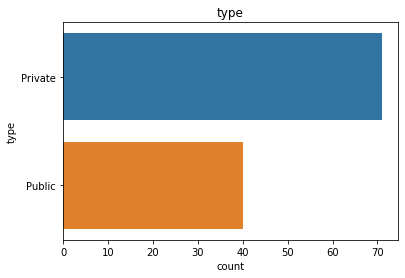

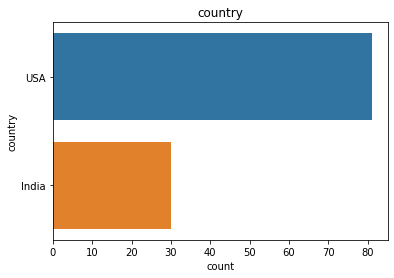

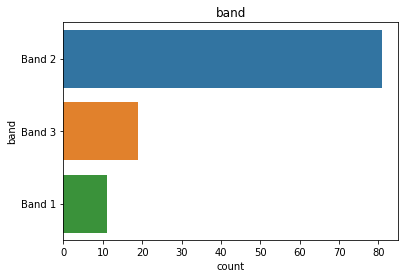

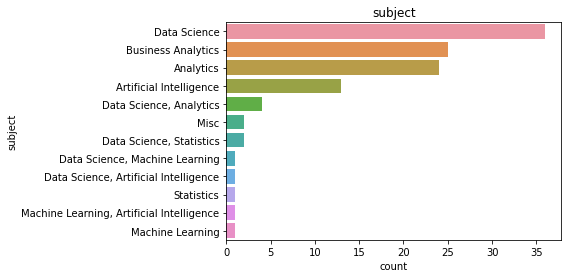

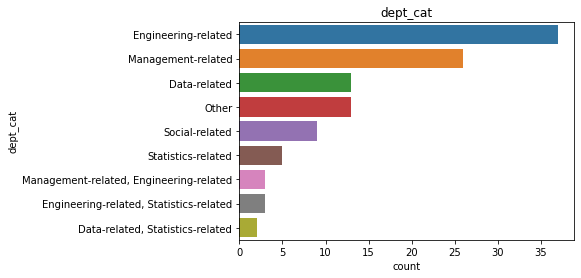

In [ ]:
for feat in categorical_features:
    if feat != 'id':
        sns.countplot(data = df, y = feat, order = df[feat].value_counts().index)
        plt.title(feat)
        plt.show()

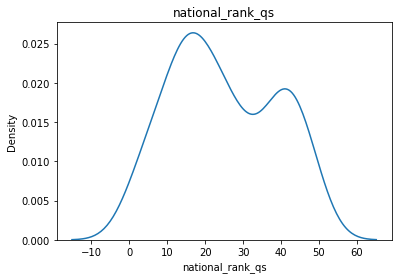

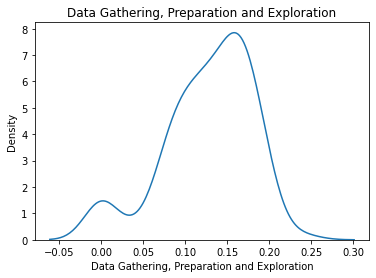

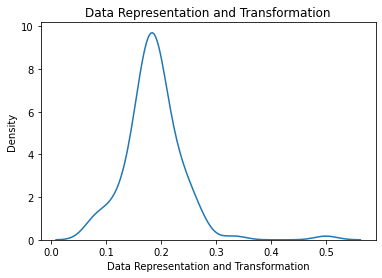

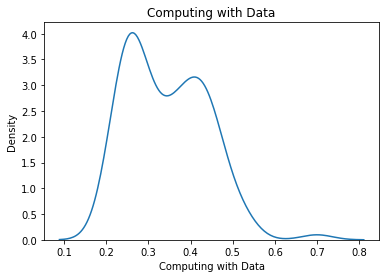

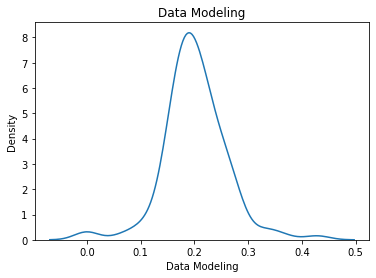

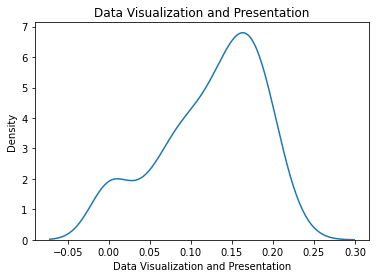

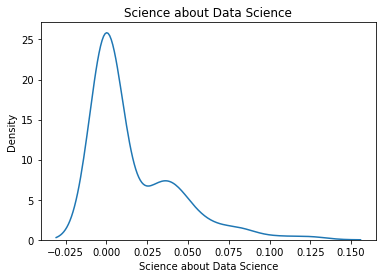

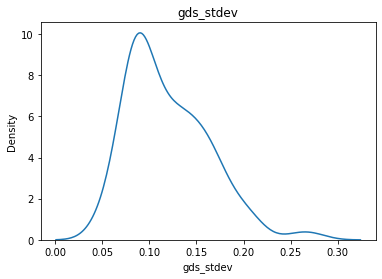

In [ ]:
for feat in quant_features:
    sns.kdeplot(df[feat])
    plt.title(feat)
    plt.show()

In [ ]:
def boxplot(group):
    for feat in quant_features:
        sns.boxplot(data = df, x = feat, y = group)
        plt.title(feat)
        plt.show()

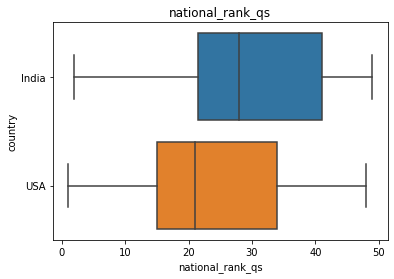

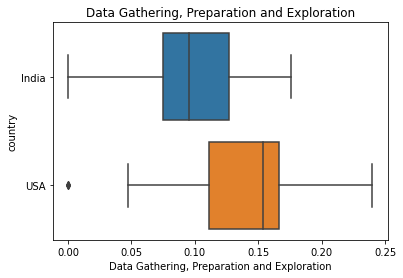

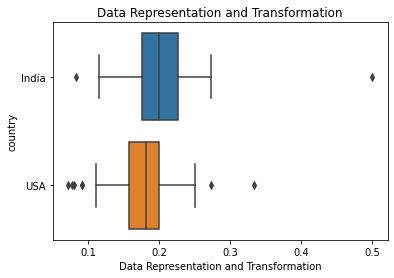

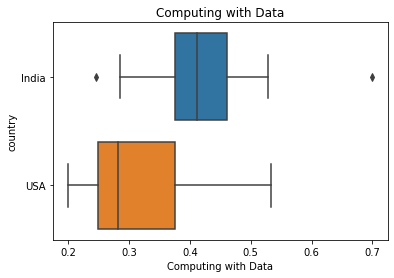

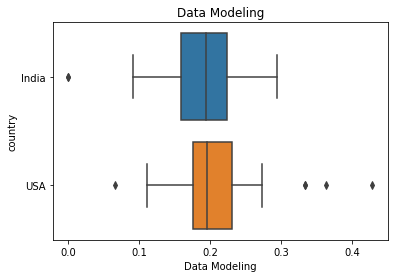

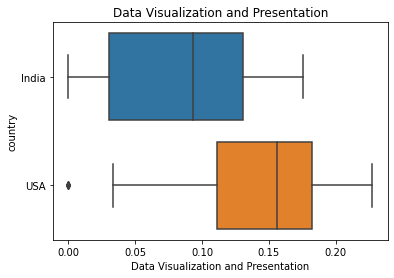

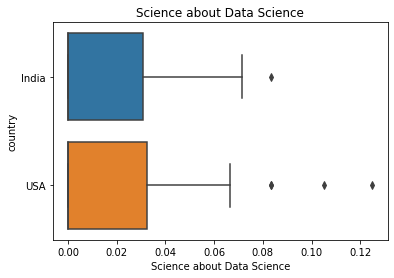

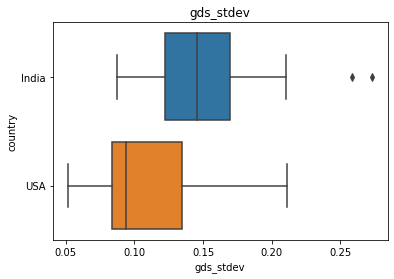

In [ ]:
boxplot("country")

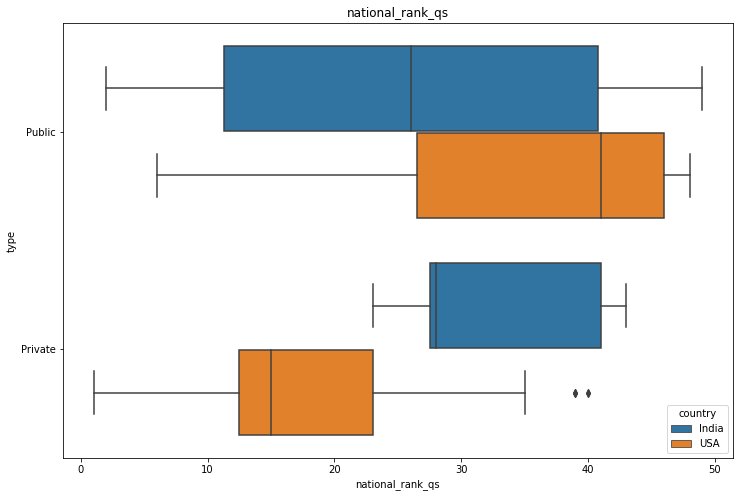

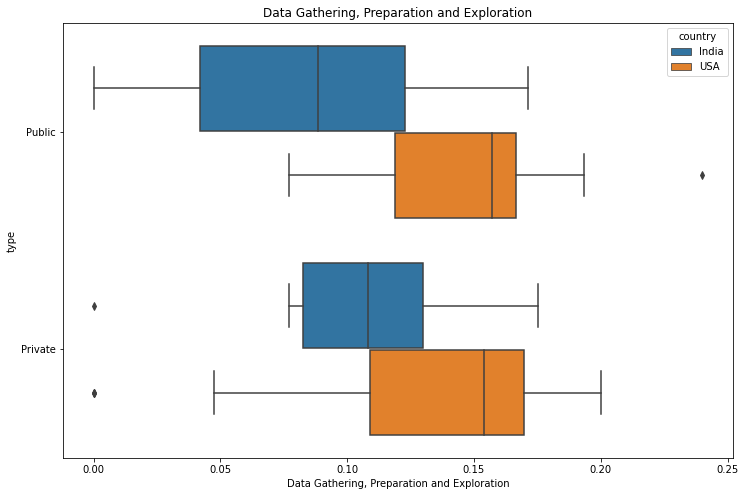

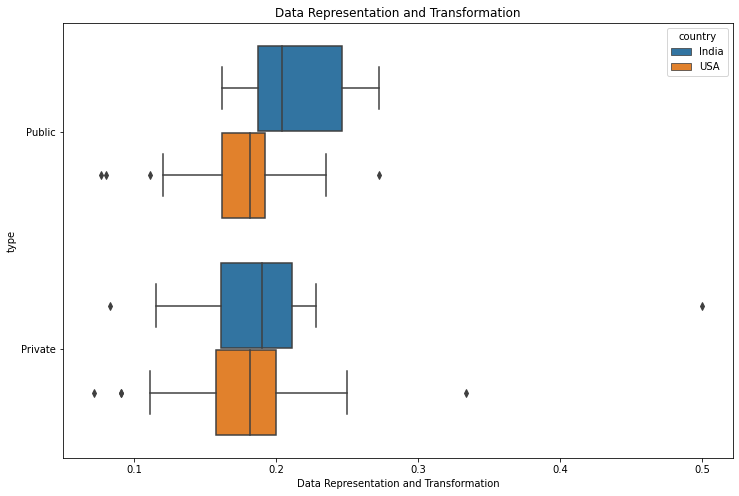

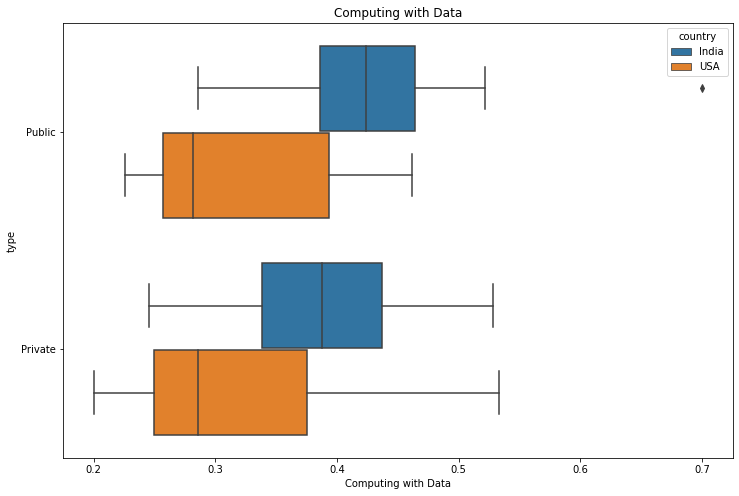

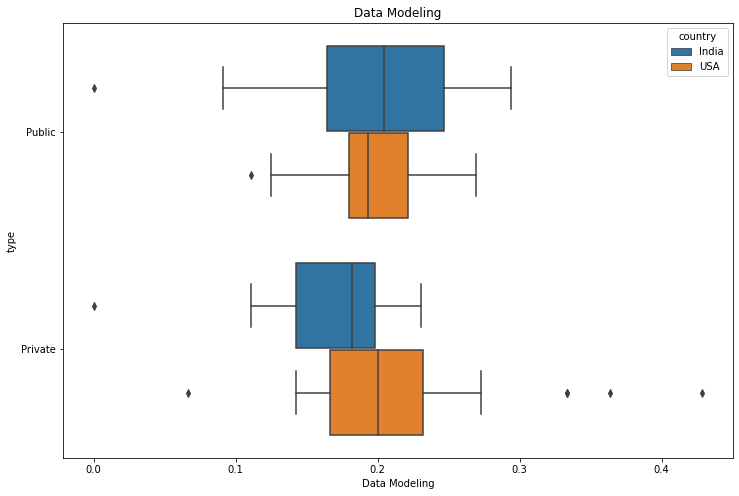

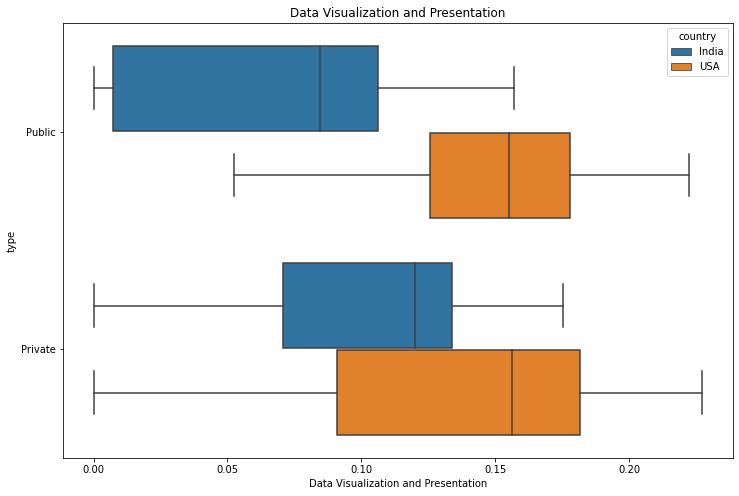

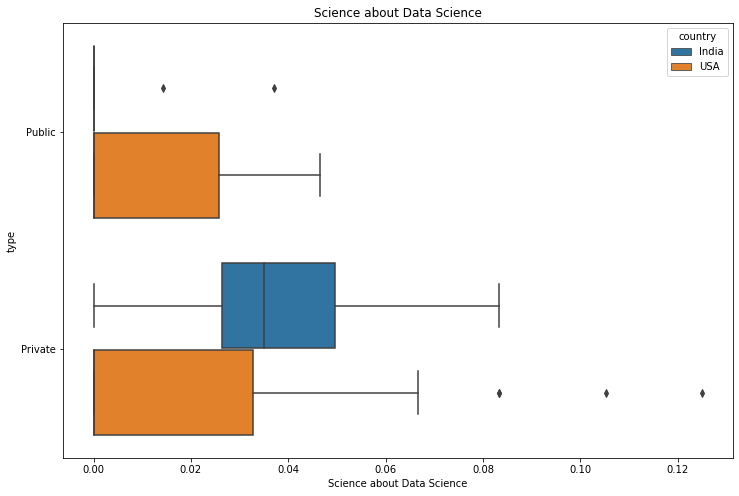

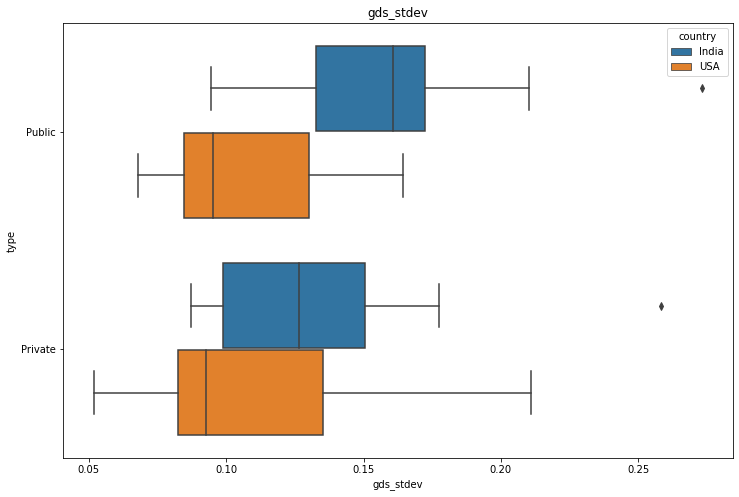

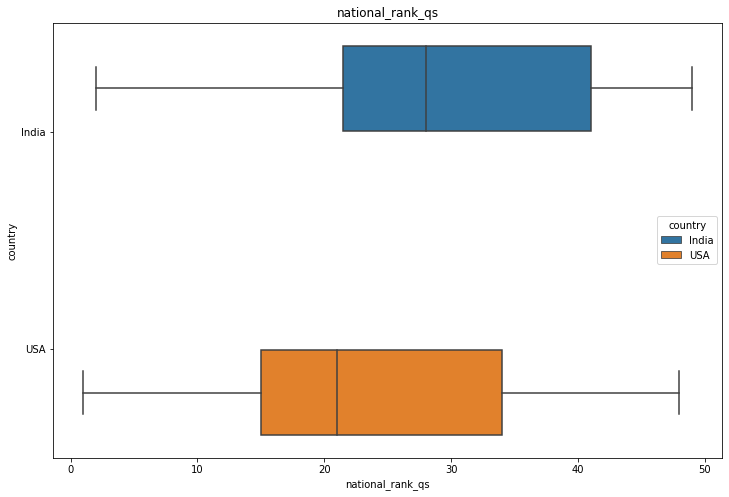

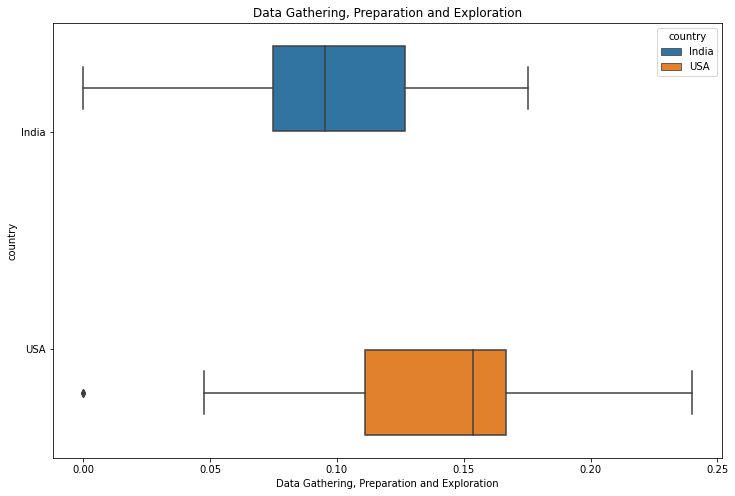

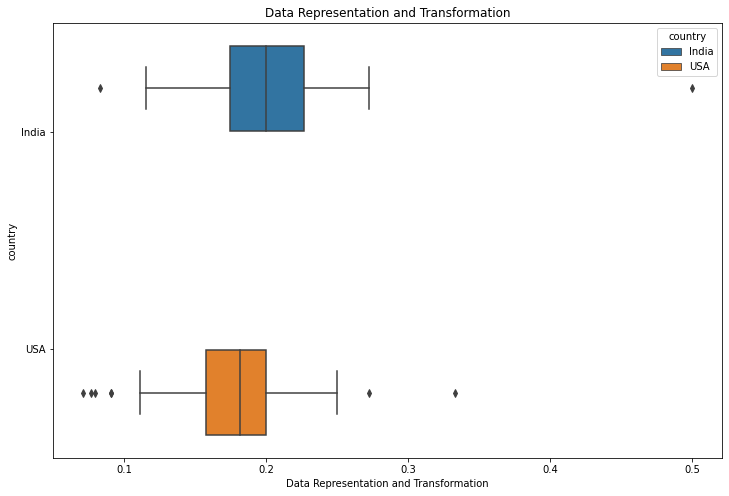

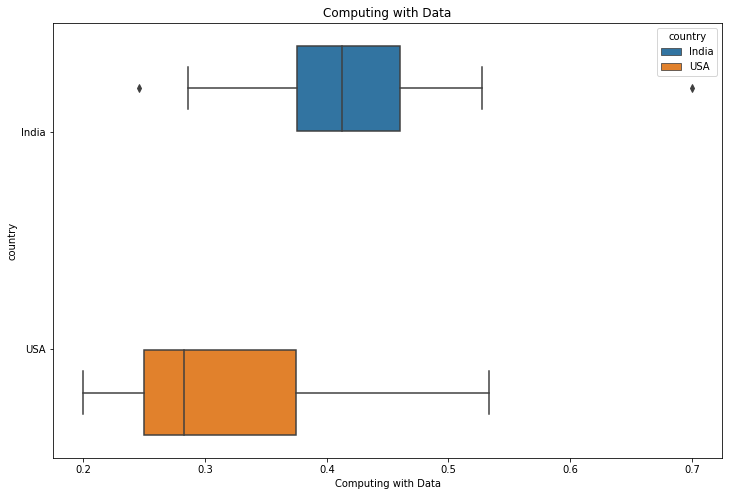

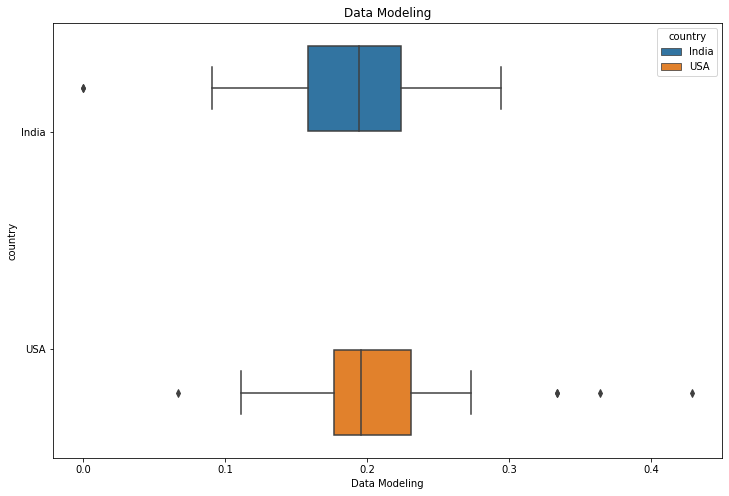

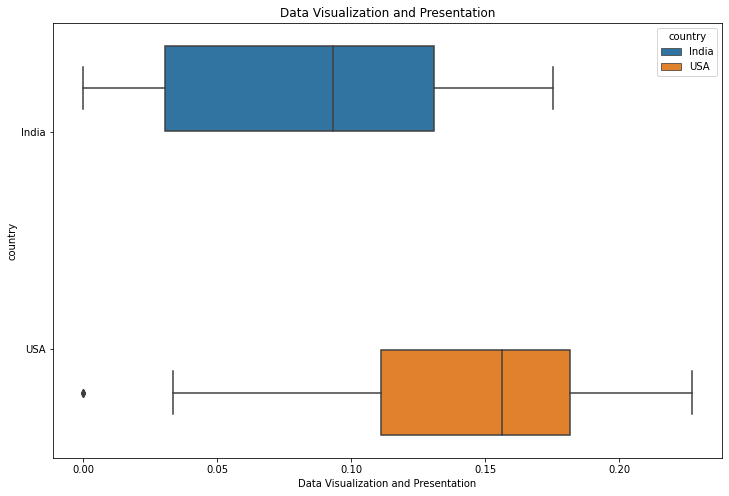

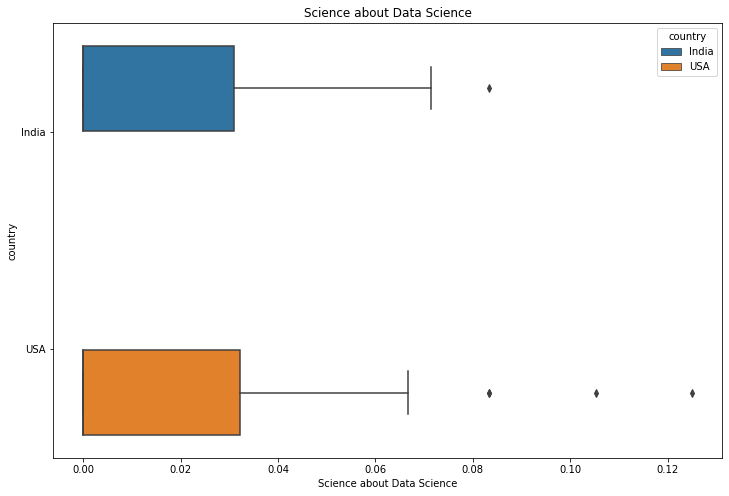

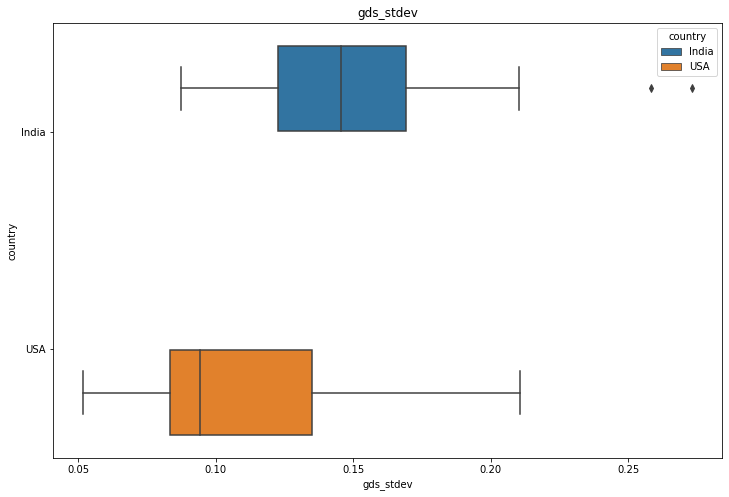

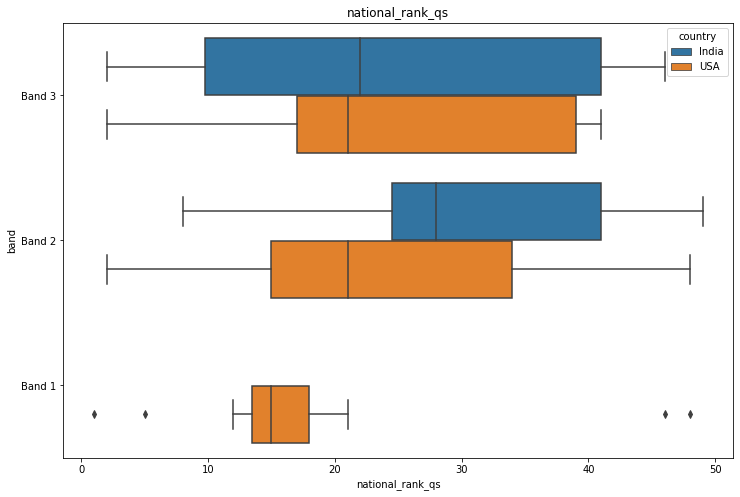

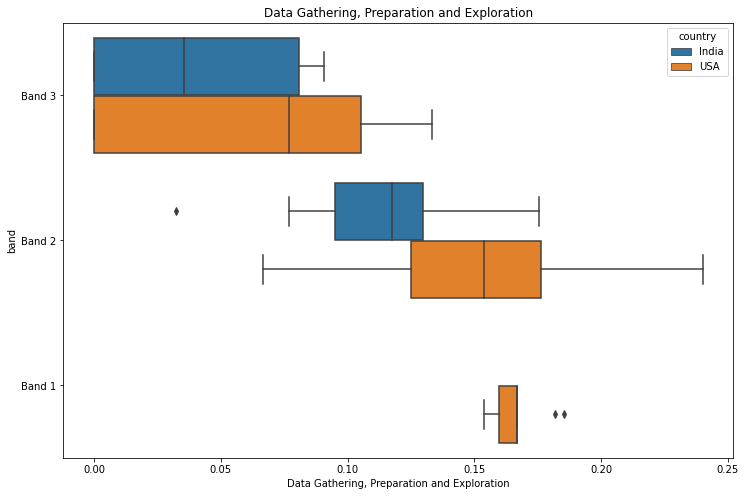

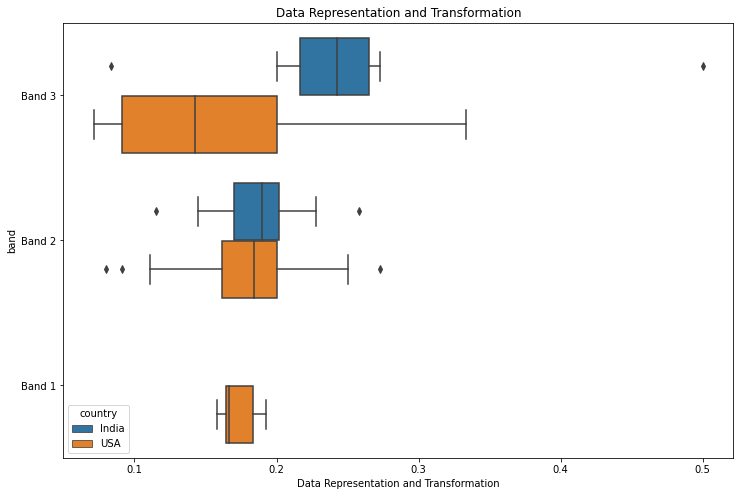

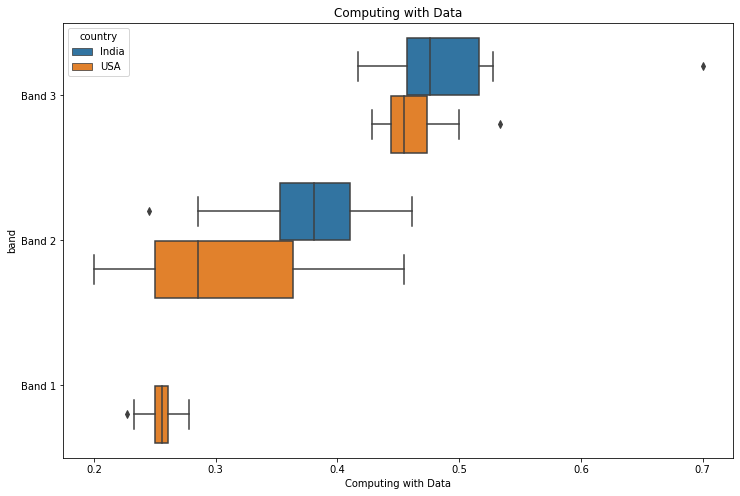

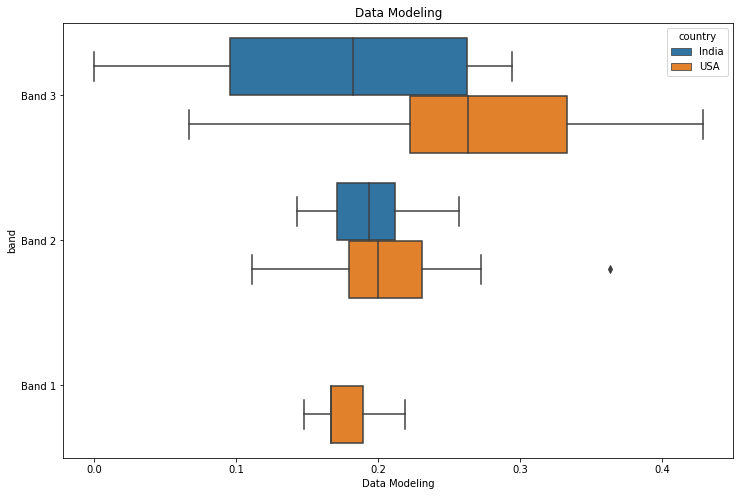

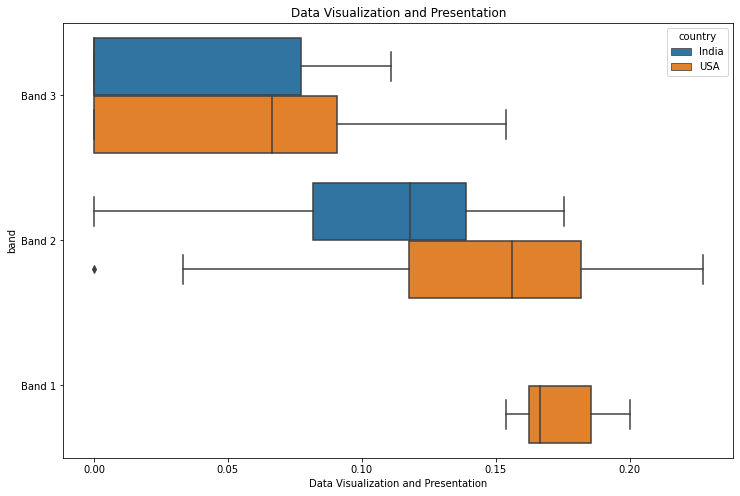

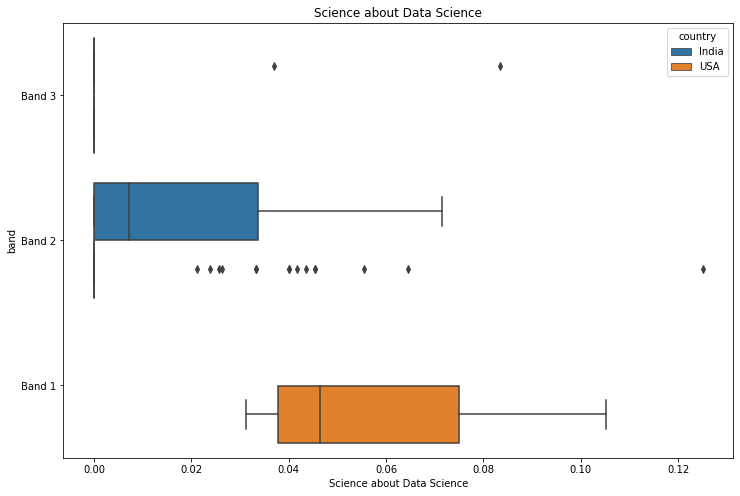

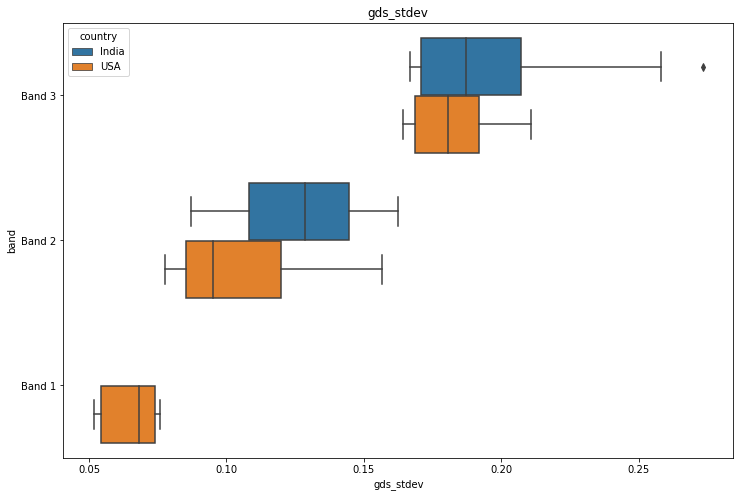

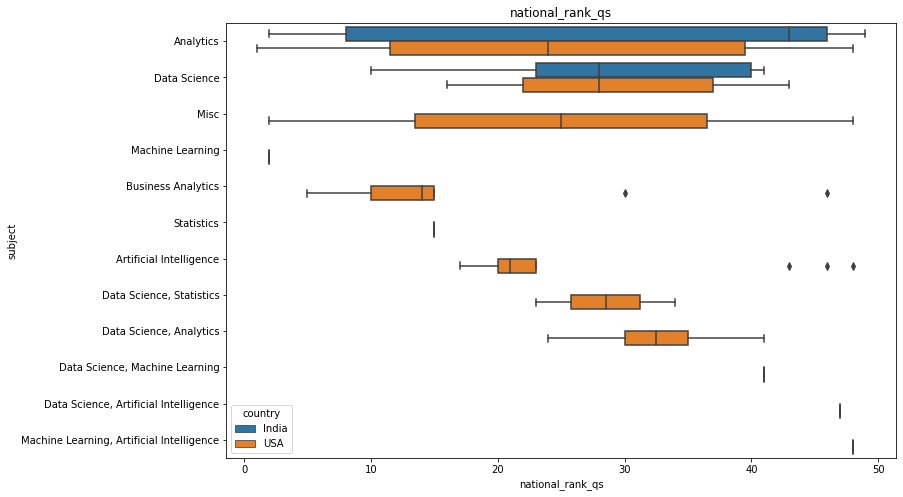

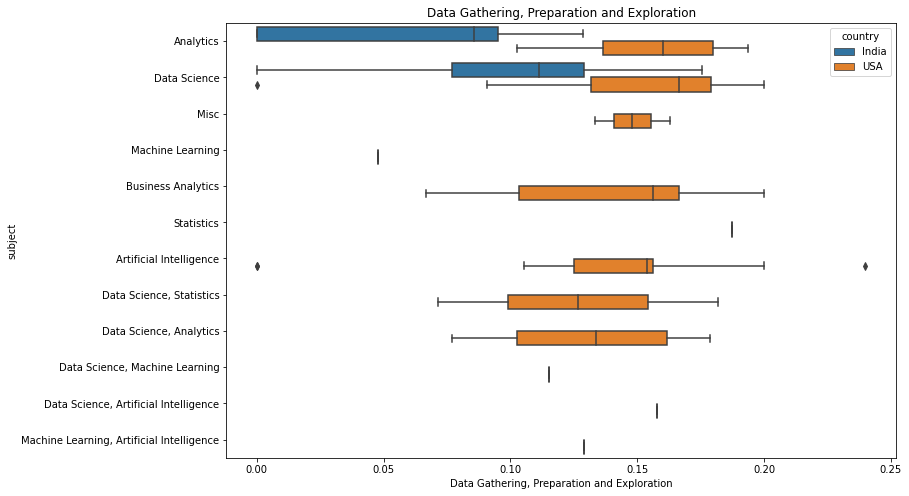

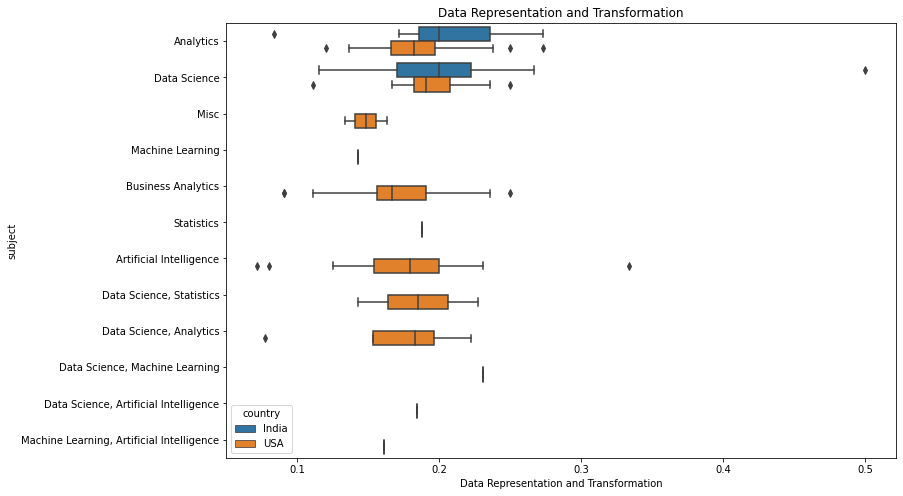

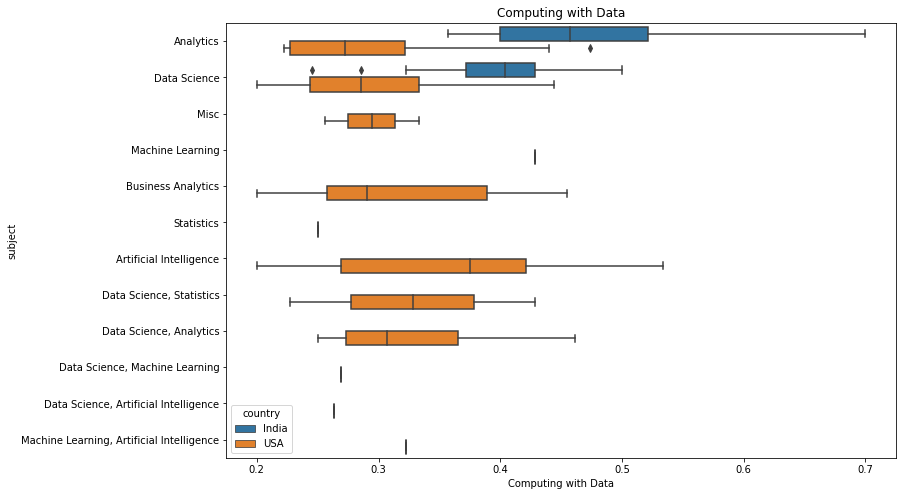

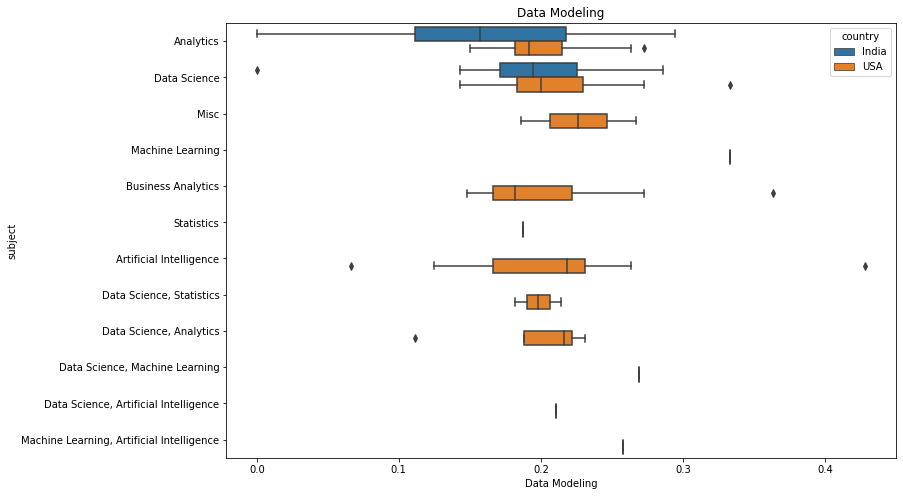

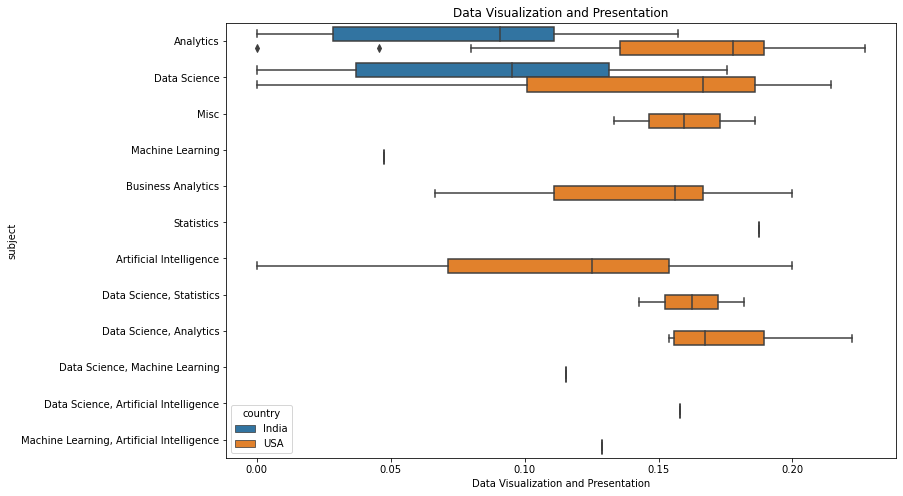

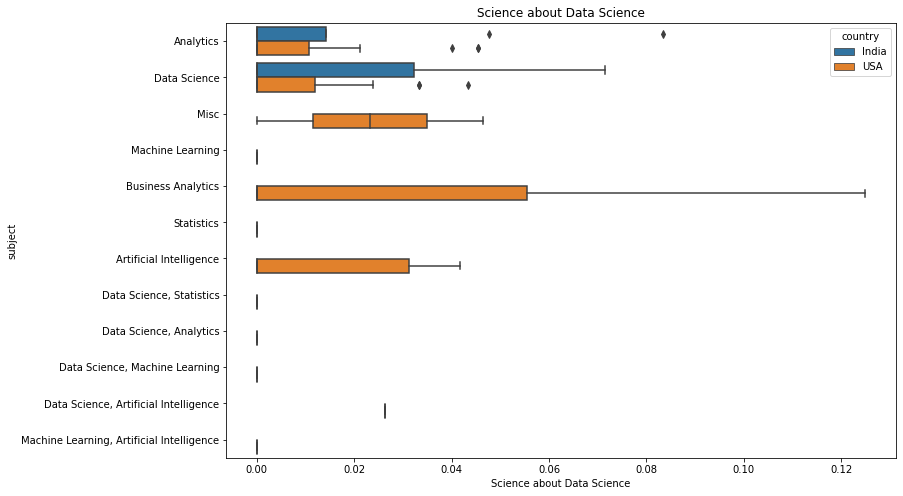

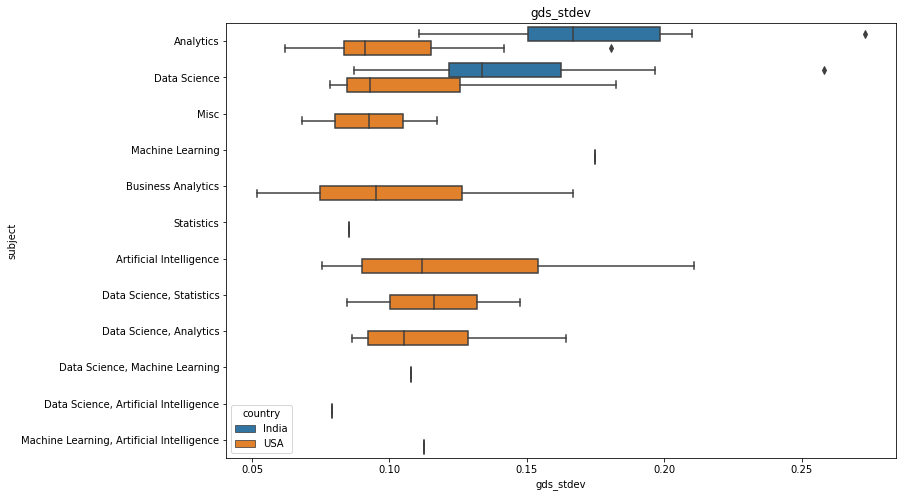

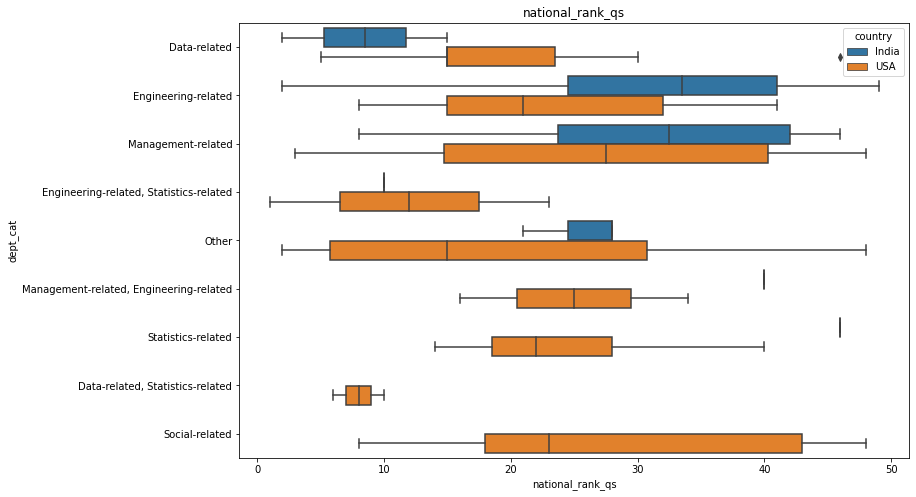

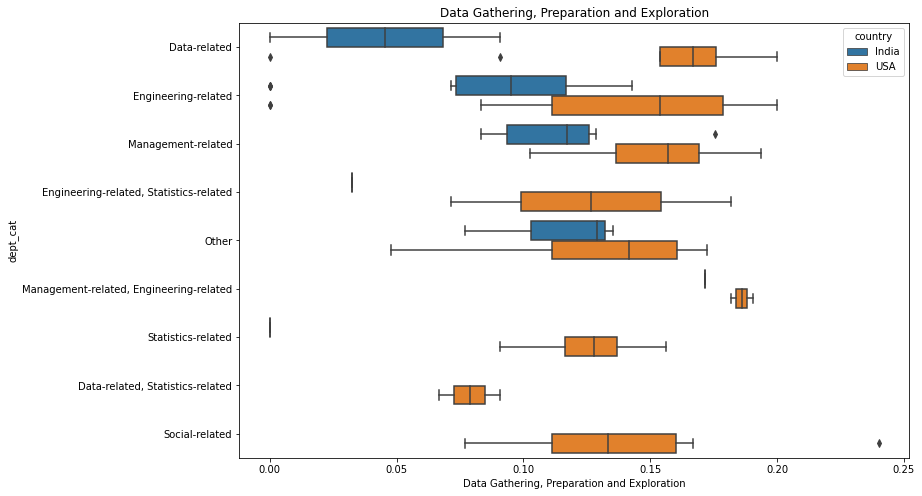

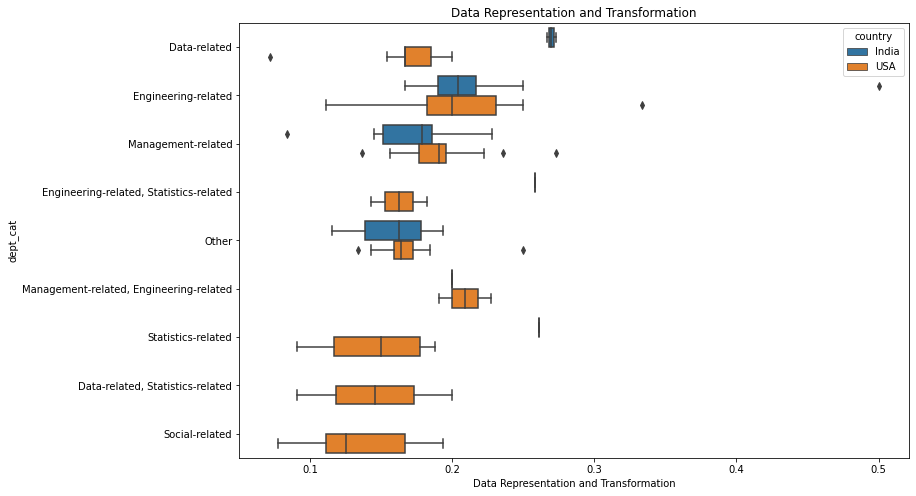

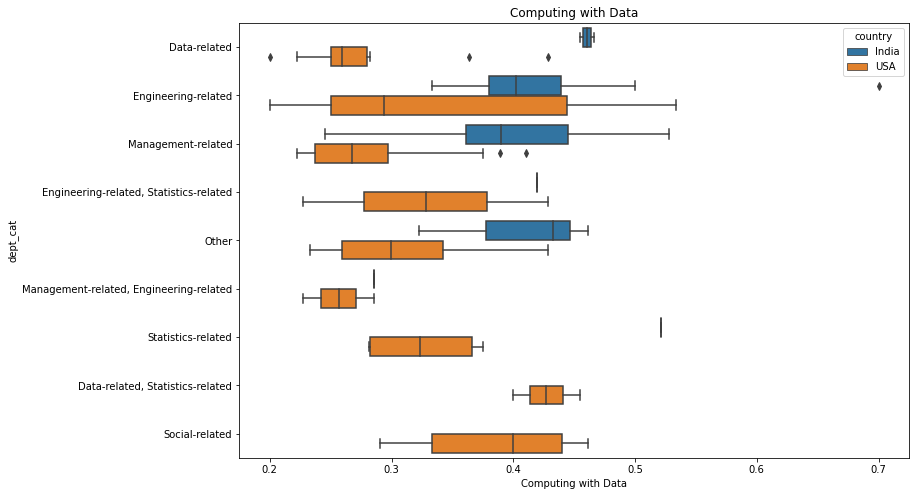

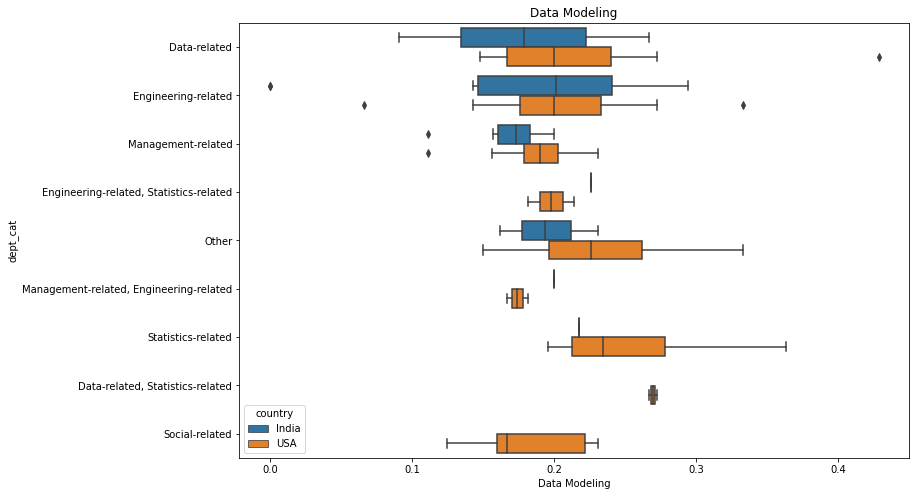

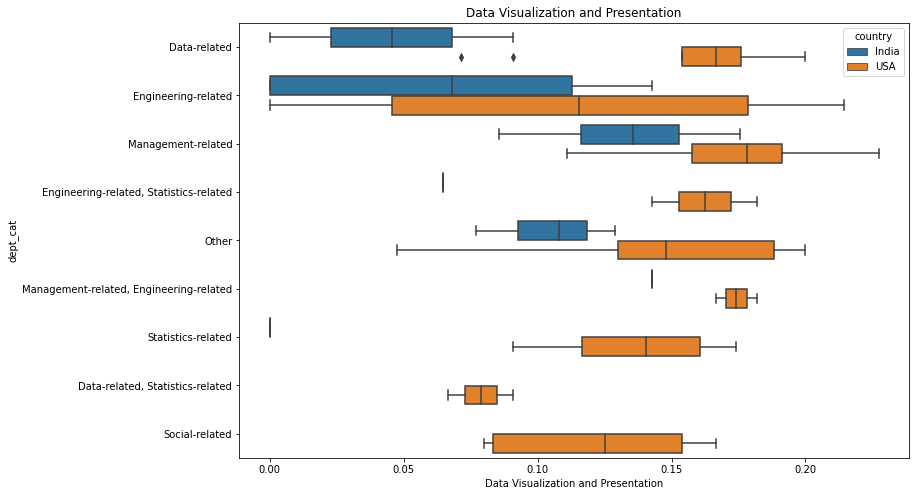

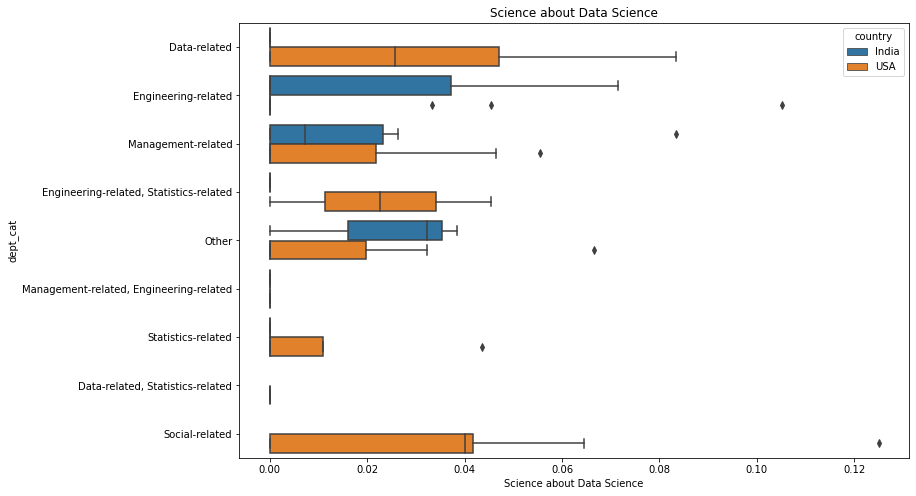

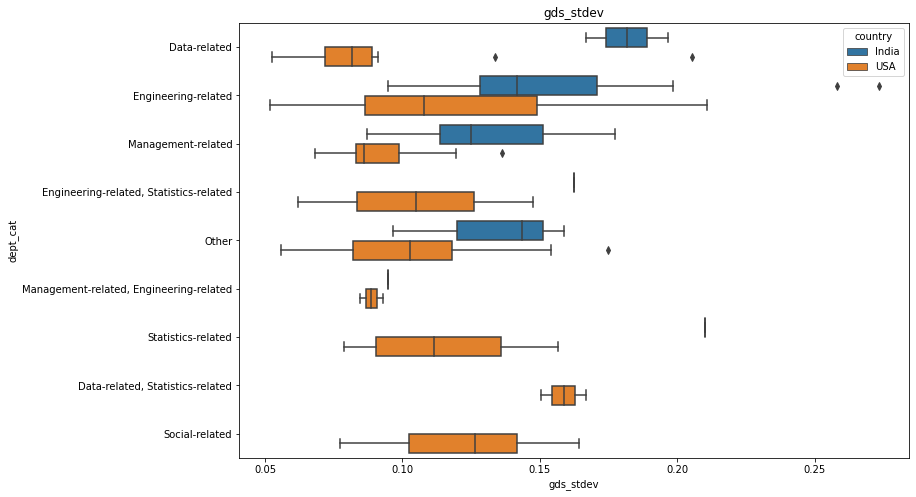

In [ ]:
for cat in categorical_features:
    if cat != 'id':
        for feat in quant_features:
            plt.figure(figsize=(12,8))
            sns.boxplot(data = df, x = feat, y = cat, hue='country')
            plt.title(feat)
            plt.show()

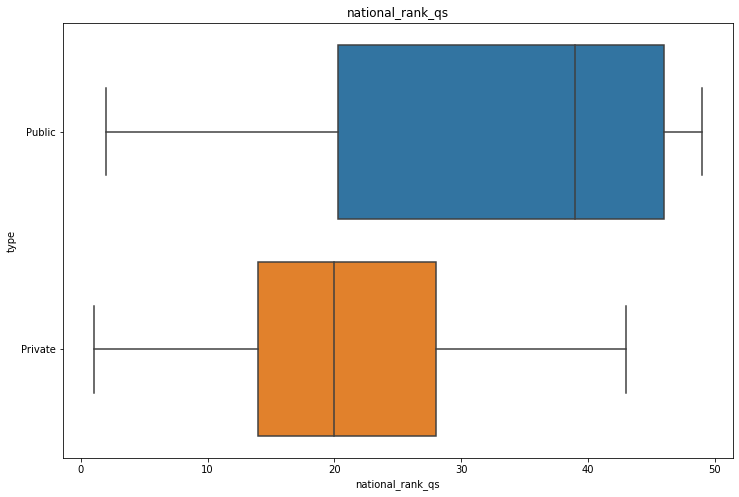

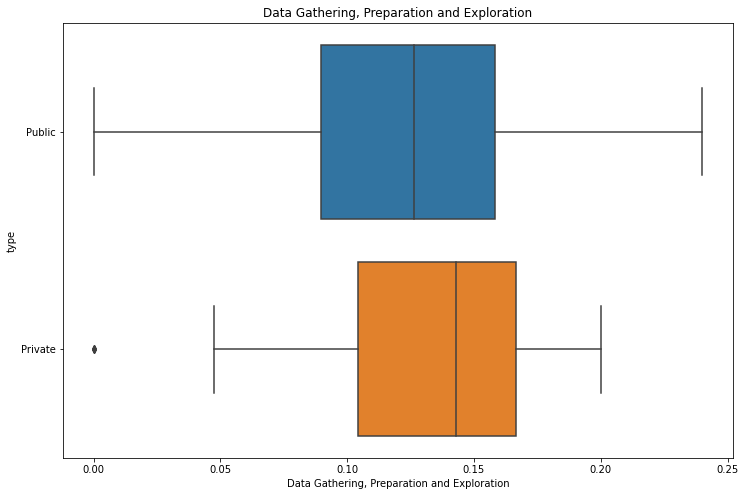

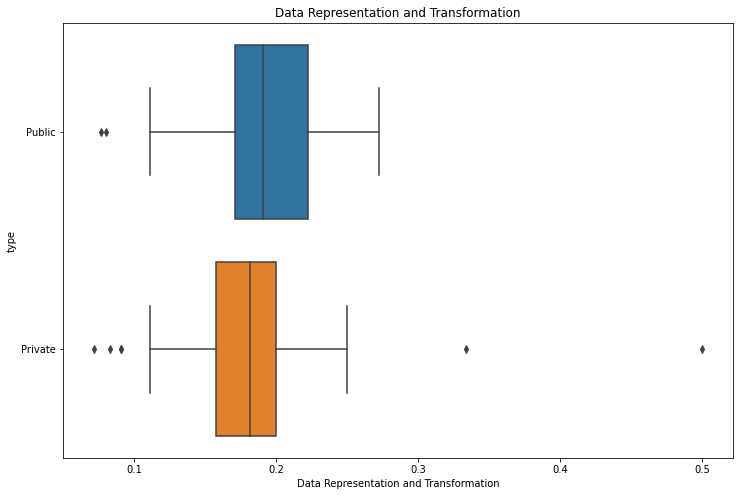

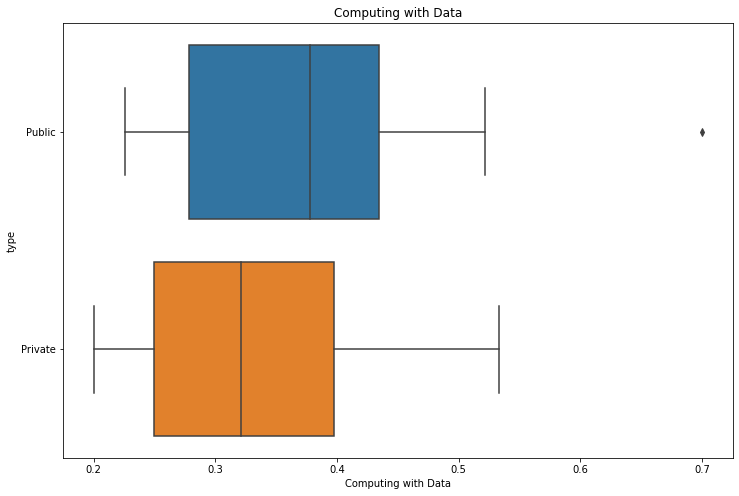

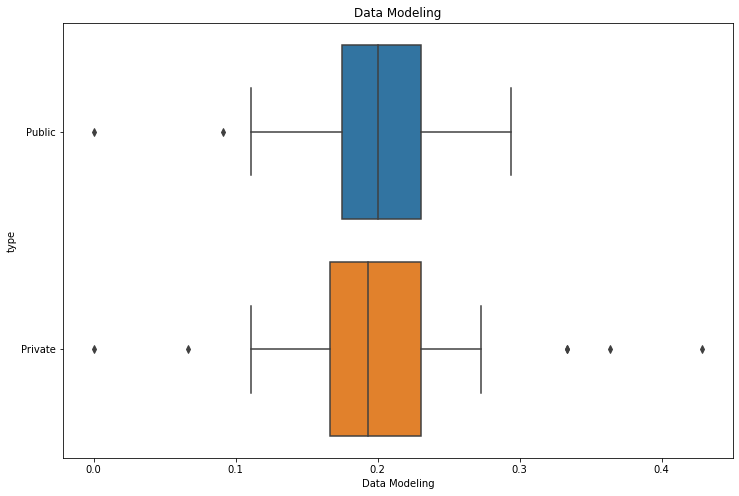

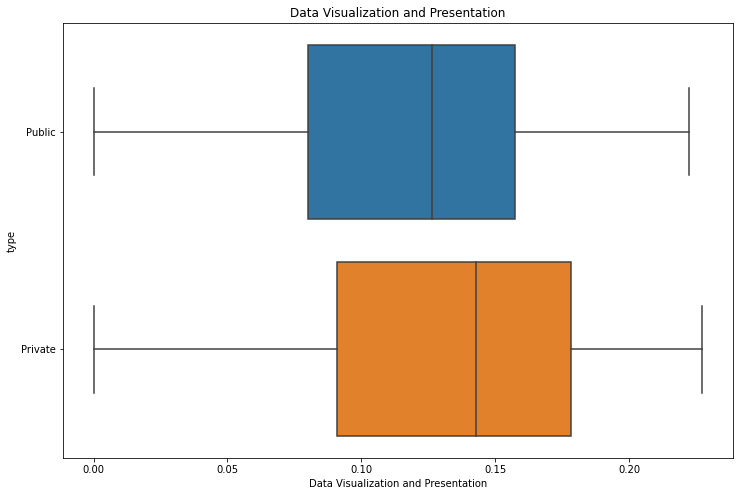

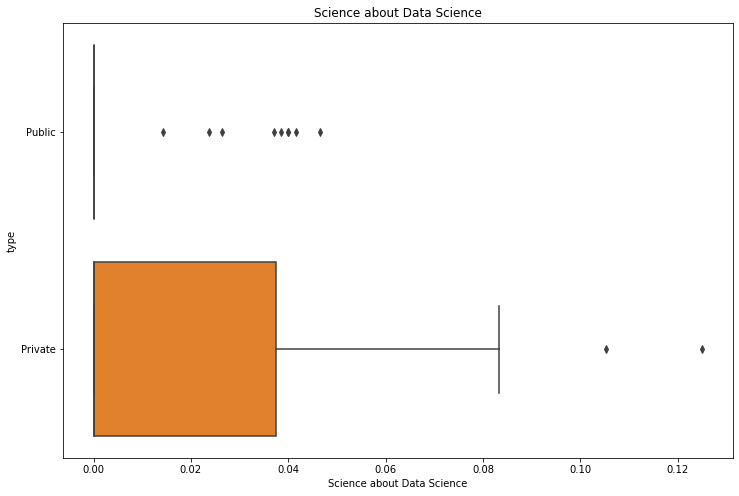

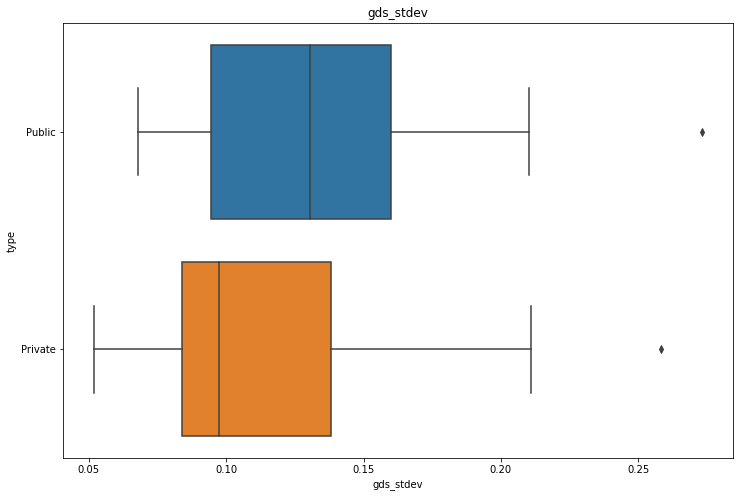

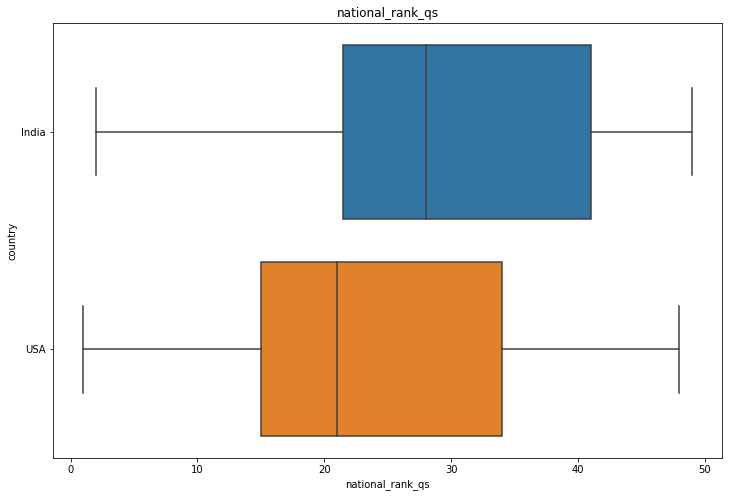

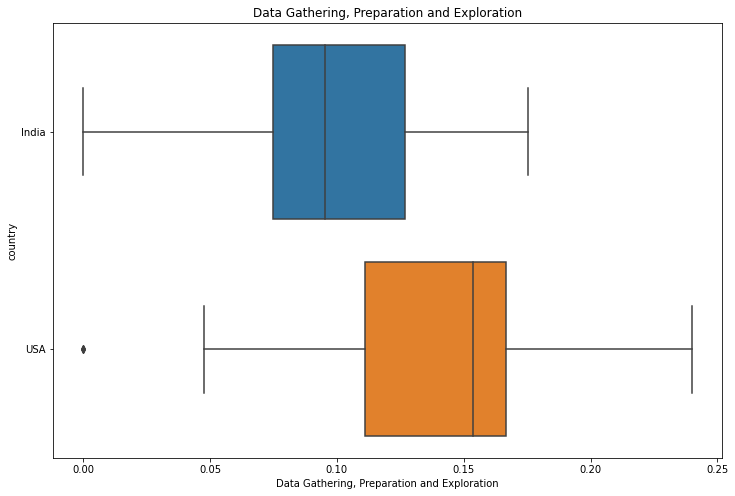

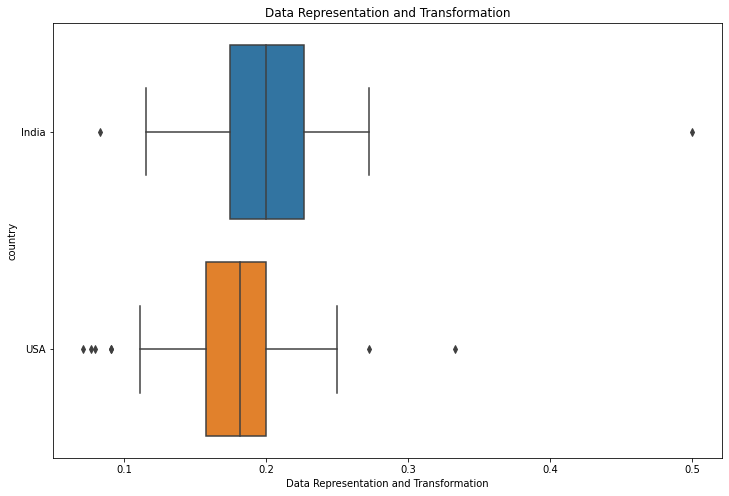

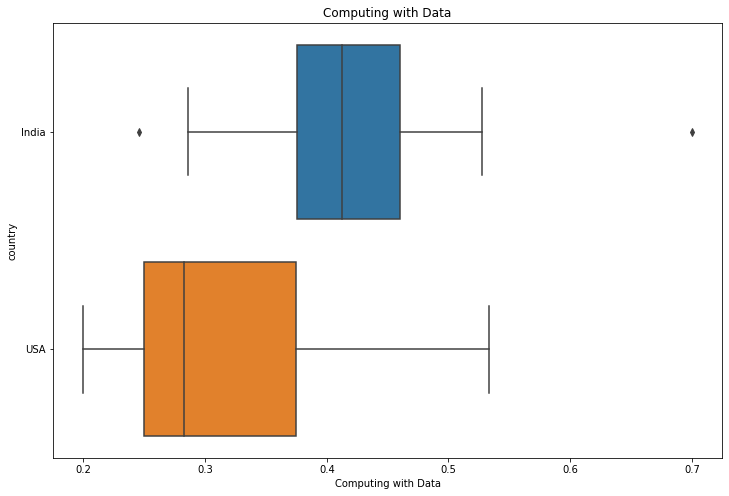

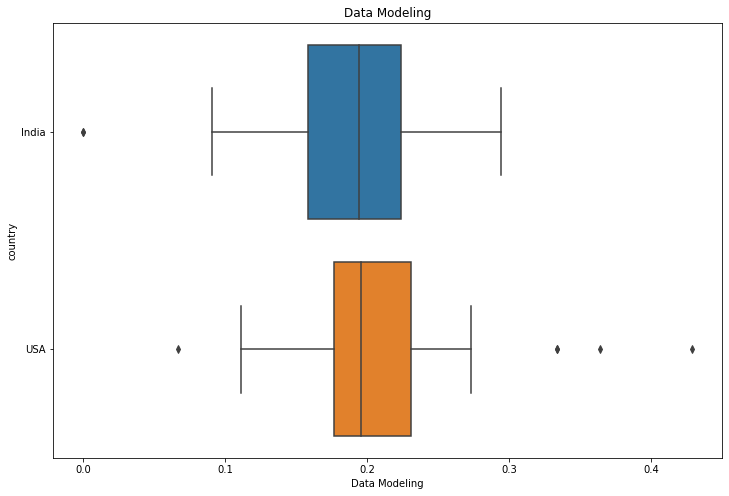

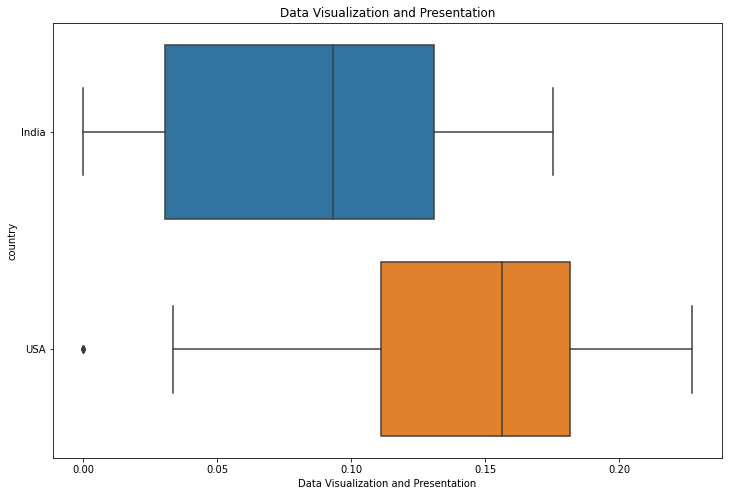

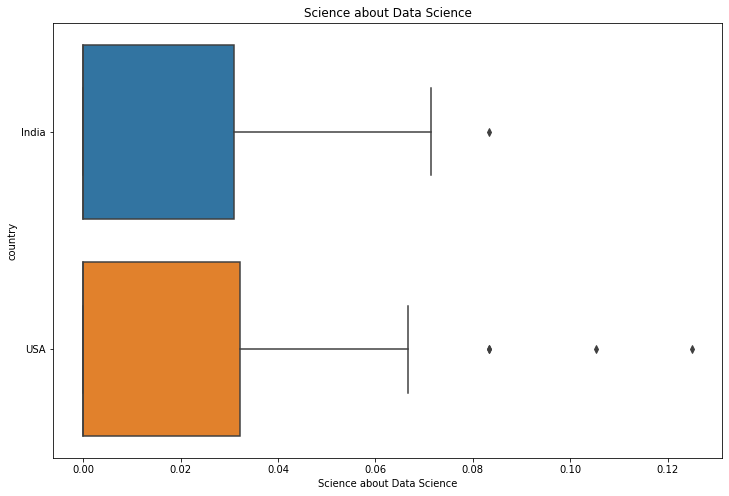

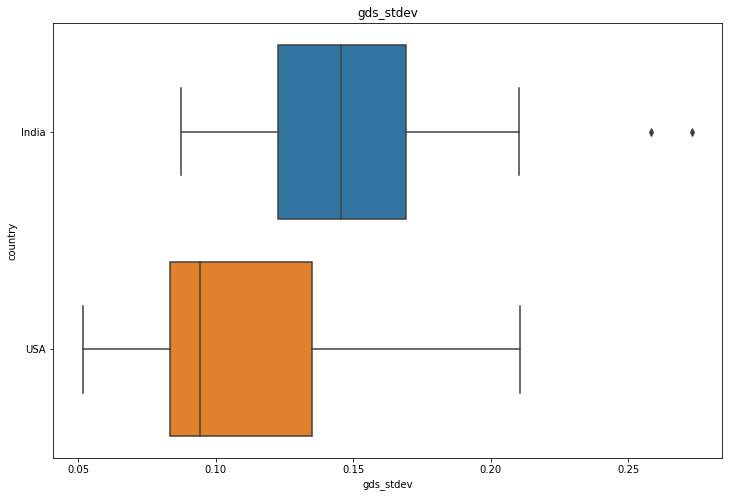

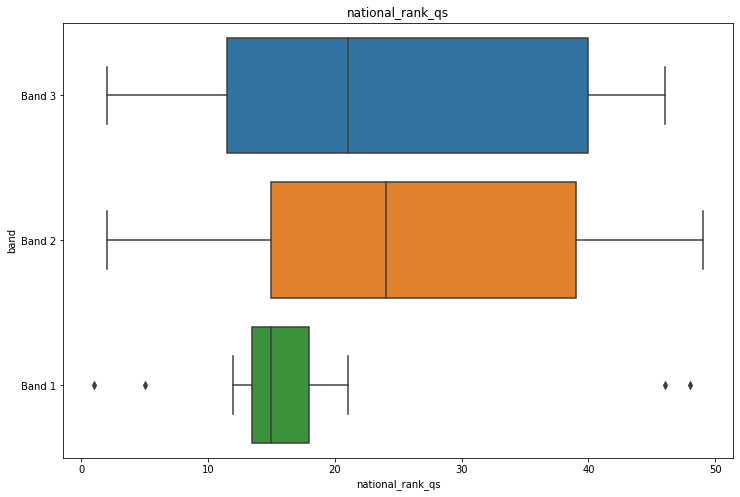

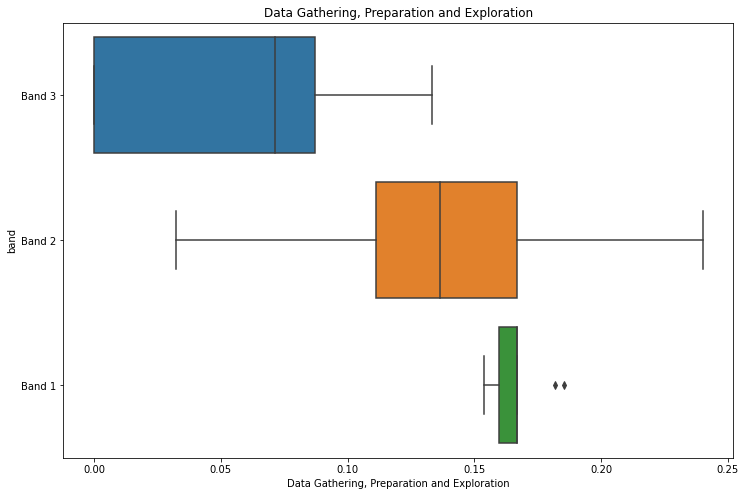

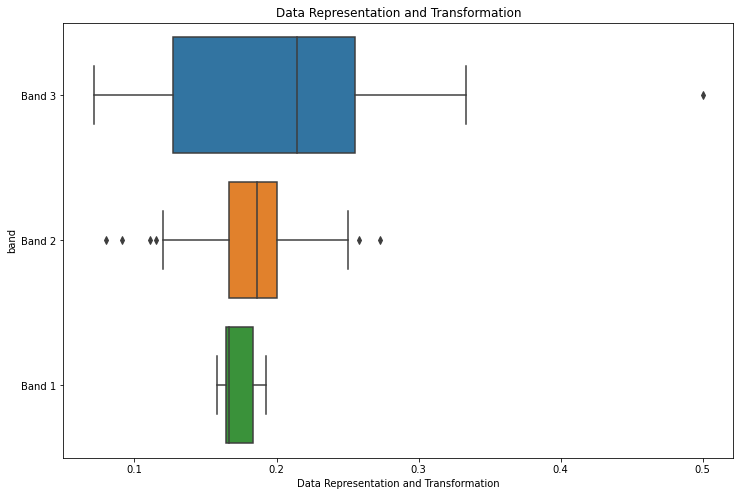

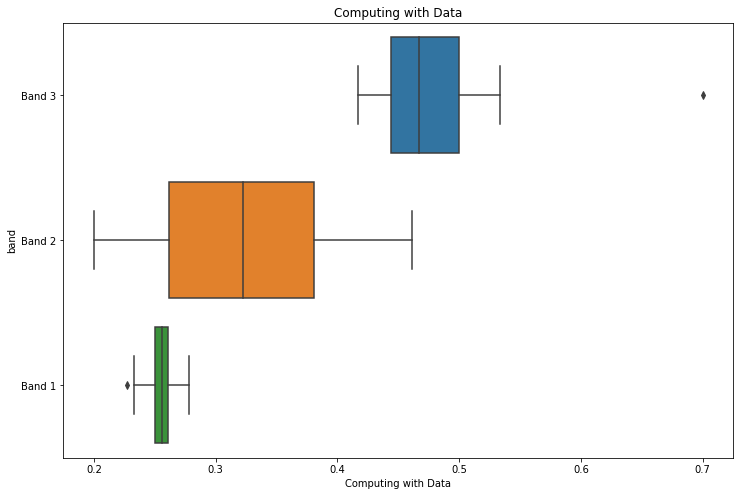

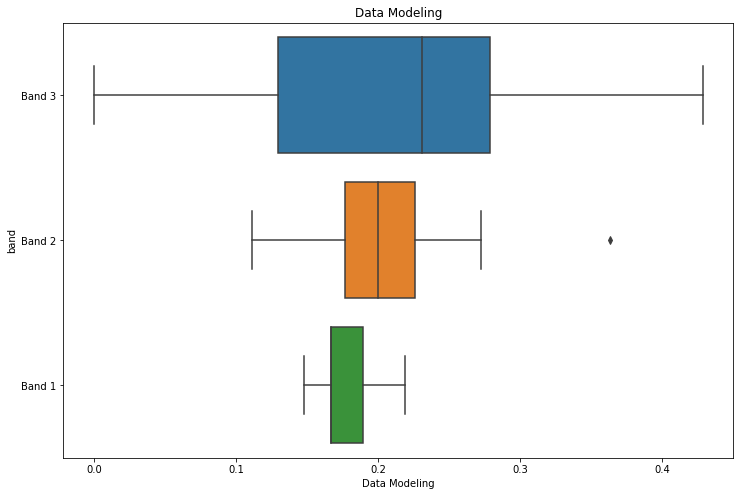

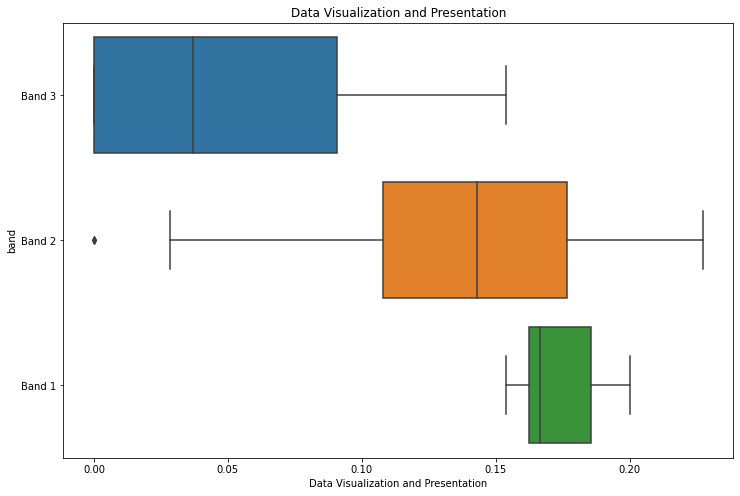

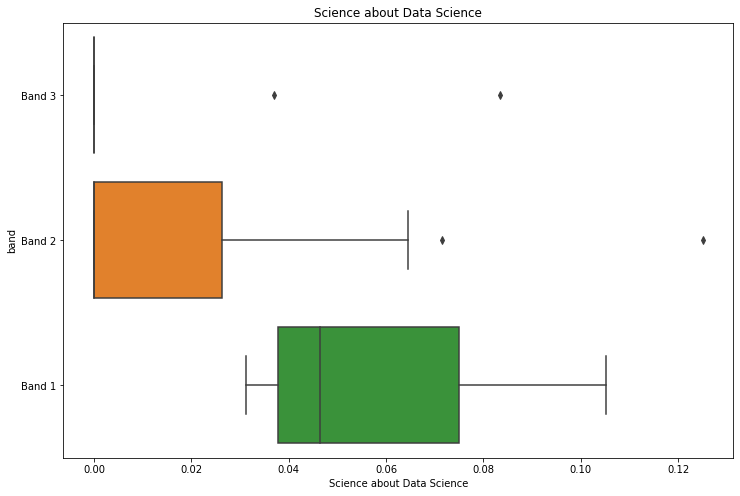

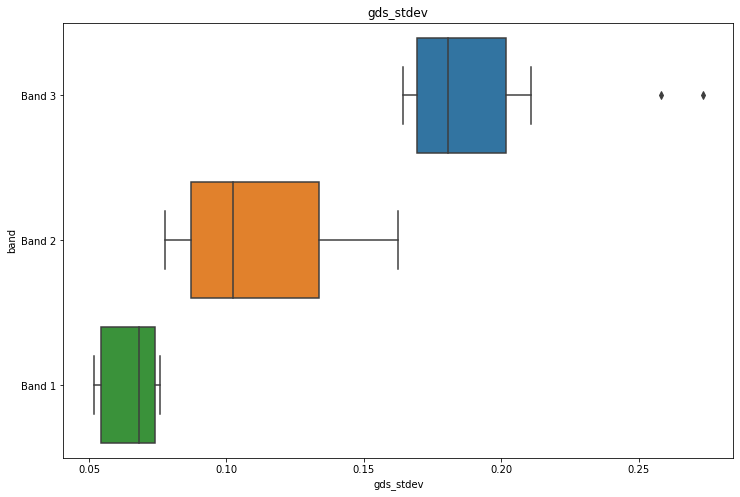

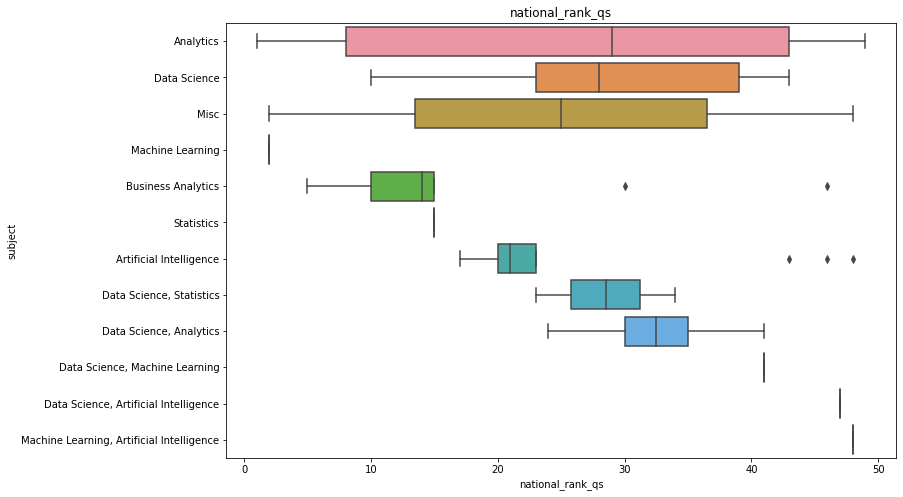

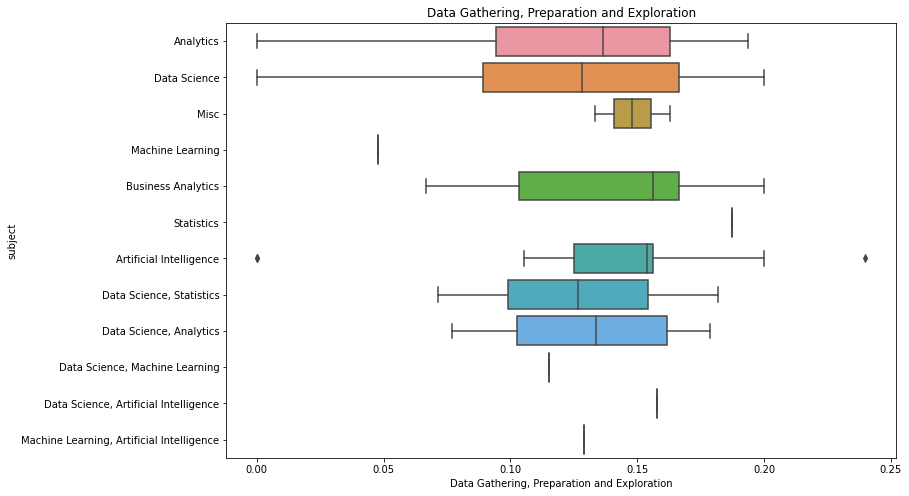

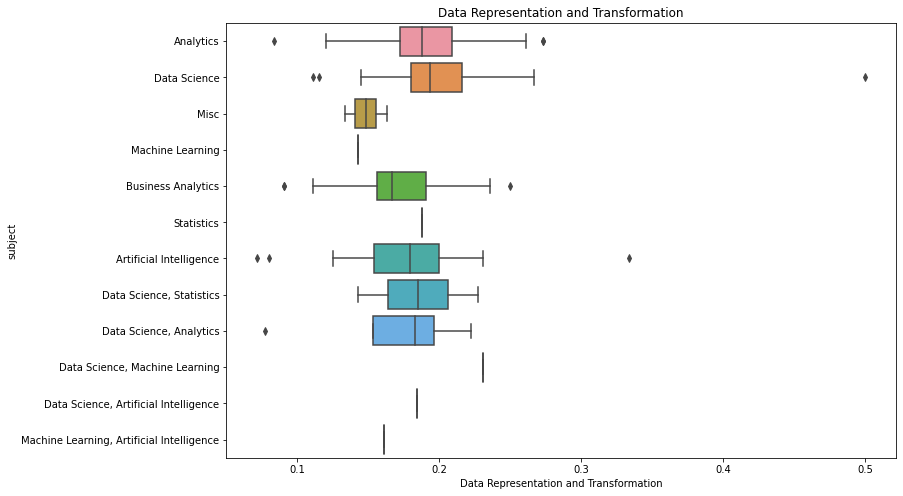

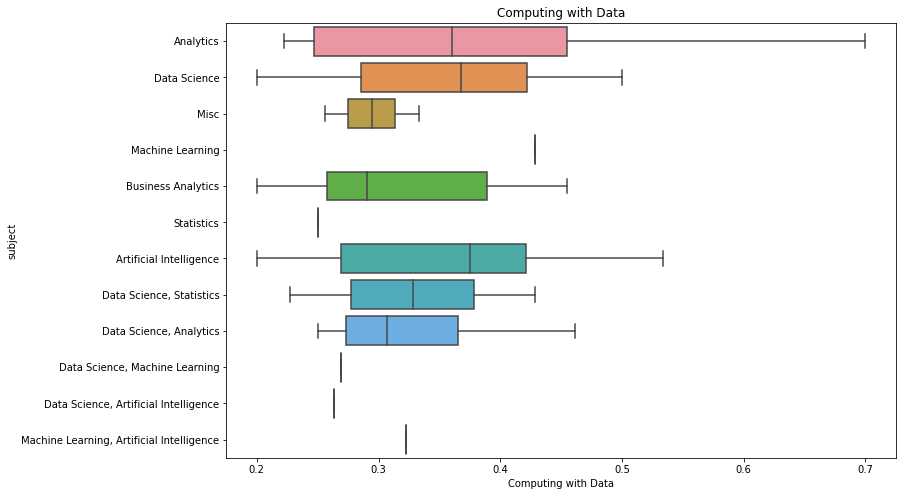

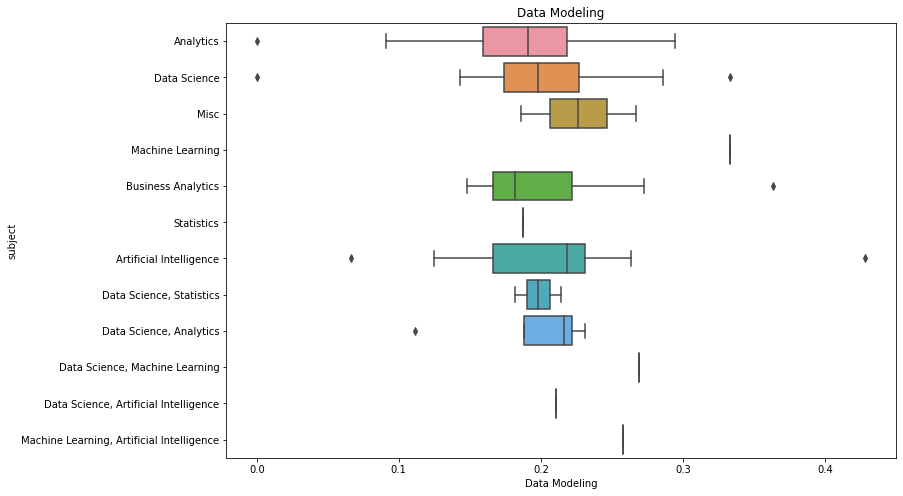

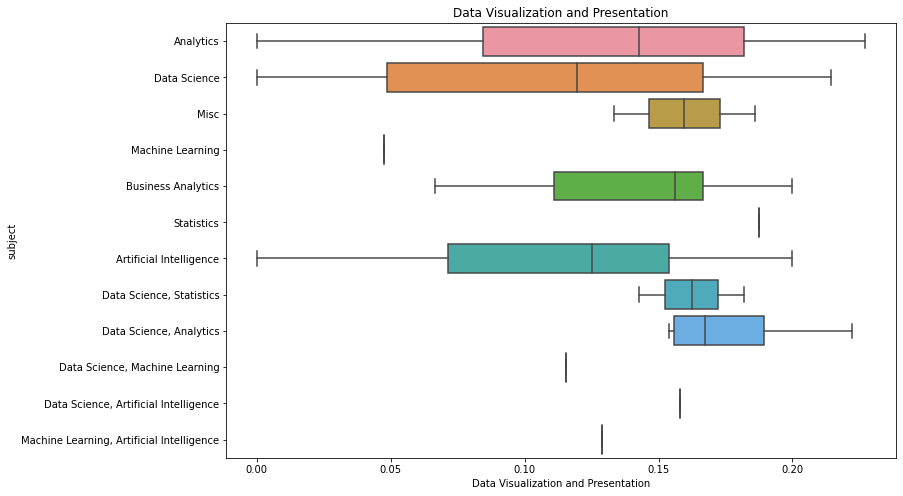

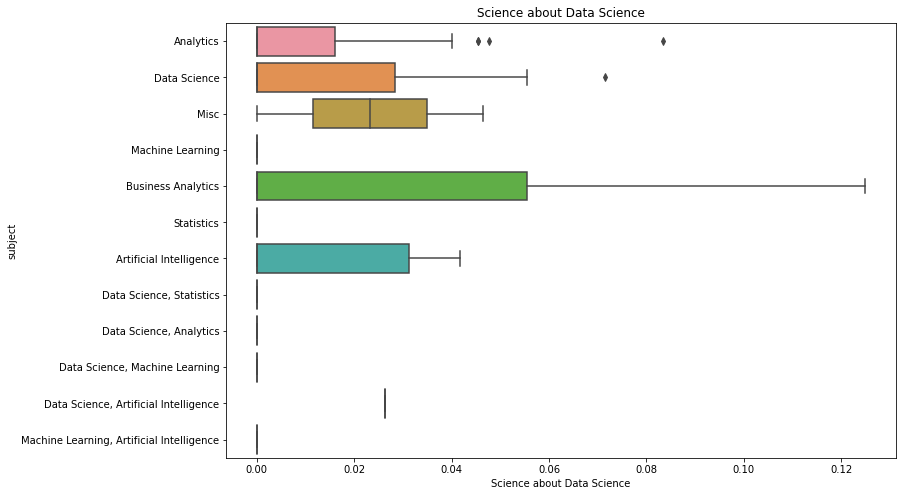

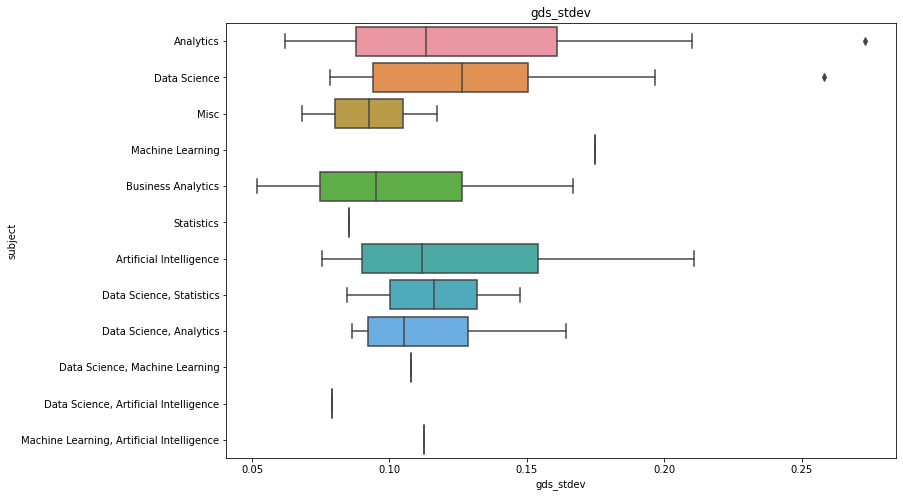

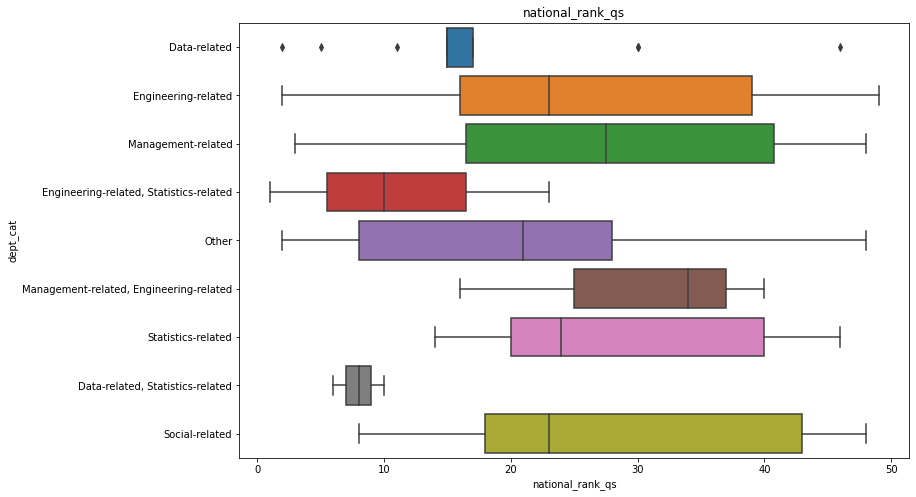

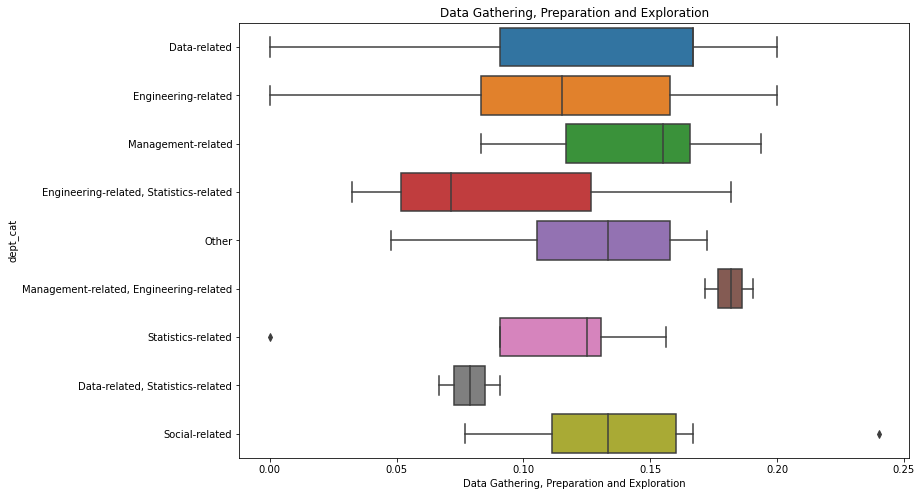

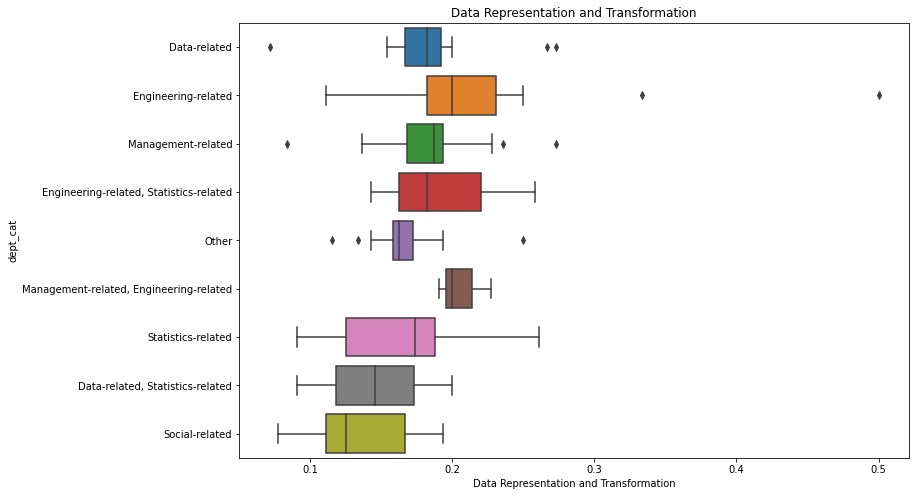

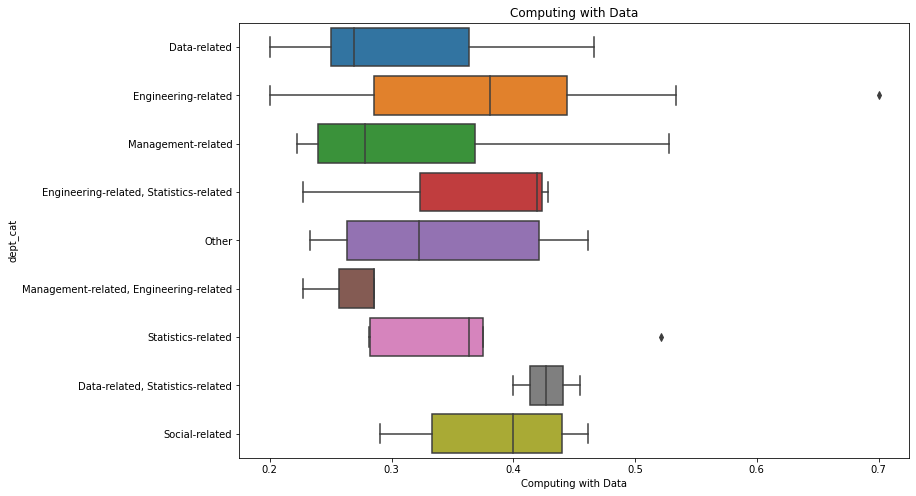

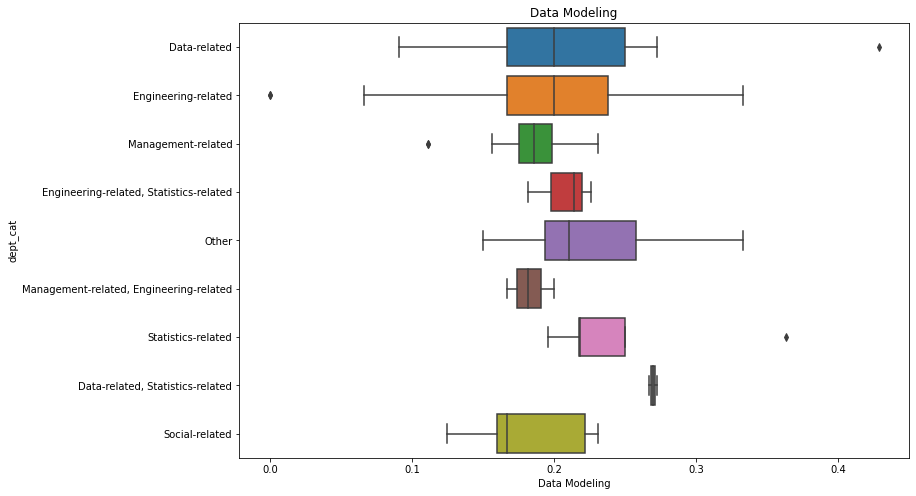

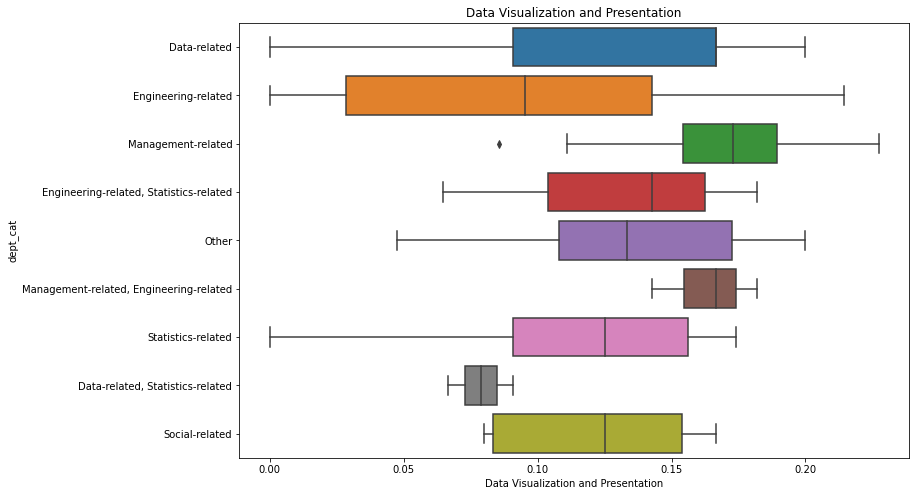

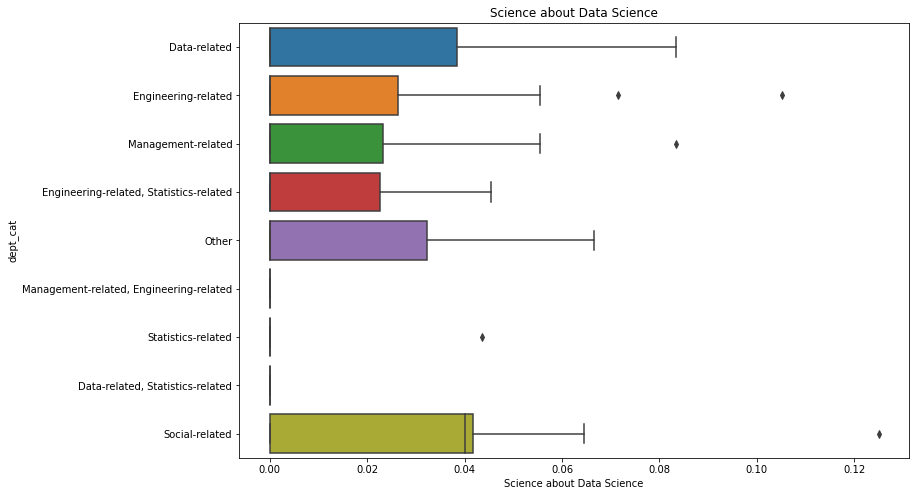

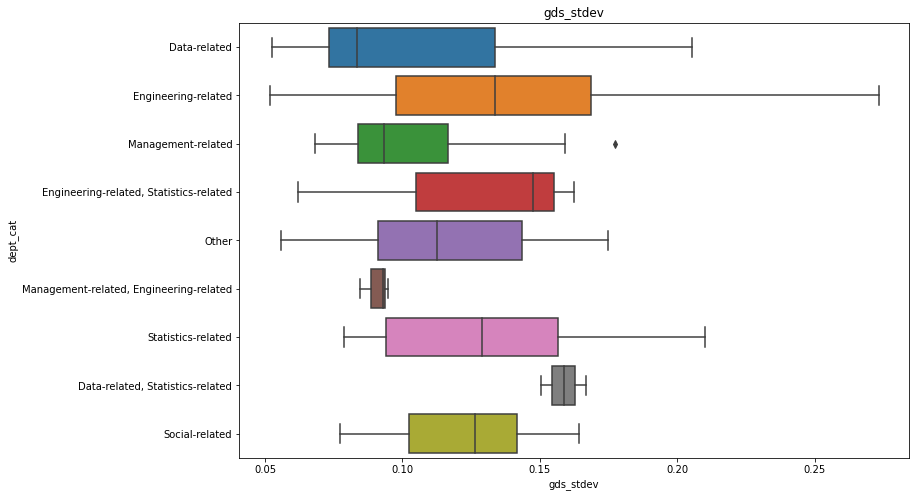

In [ ]:
for cat in categorical_features:
    if cat != 'id':
        for feat in quant_features:
            plt.figure(figsize=(12,8))
            sns.boxplot(data = df, x = feat, y = cat)
            plt.title(feat)
            plt.show()

In [ ]:
df[df.country=="USA"].describe()

,national_rank_qs,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,23.308642,0.141214,0.178374,0.316259,0.207606,0.140622,0.015925,0.0
std,13.504297,0.046346,0.044198,0.083549,0.053884,0.055391,0.027267,0.0
min,1.000000,0.000000,0.071429,0.200000,0.066667,0.000000,0.000000,0.0
25%,15.000000,0.111111,0.157895,0.250000,0.176471,0.111111,0.000000,0.0
50%,21.000000,0.153846,0.181818,0.282609,0.195652,0.156250,0.000000,0.0
75%,34.000000,0.166667,0.200000,0.375000,0.230769,0.181818,0.032258,0.0
max,48.000000,0.240000,0.333333,0.533333,0.428571,0.227273,0.125000,0.0


In [ ]:
df[df.uni_name=="Indian Institute of Science Bangalore"]

,uni_name,pgm_name,dur_yrs,type,national_rank_qs,dept_involved,location,url,descr,header_tag,...,Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable,country,gds_mean,gds_stdev,band
0,Indian Institute of Science Bangalore,M.Tech. Computational and Data Science,2,Public,2,Department of Computational and Data Sciences,Karnataka,http://cds.iisc.ac.in/admissions/course-degrees/,Computational Science and Data Science are int...,"['h1', 'h2', 'h3']",...,0.272727,0.454545,0.090909,0.090909,0.0,0.0,India,0.166667,0.166804,Band 3
1,Indian Institute of Science Bangalore,M.Tech. Artificial Intelligence,2,Public,2,Departments of Computer Science and Automation...,Karnataka,https://eecs.iisc.ac.in/mtechai/,Artificial Intelligence has captured the ima...,"['h1', 'h2']",...,0.235294,0.470588,0.294118,0.000000,0.0,0.0,India,0.166667,0.198321,Band 3


<AxesSubplot:xlabel='gds_stdev', ylabel='Density'>

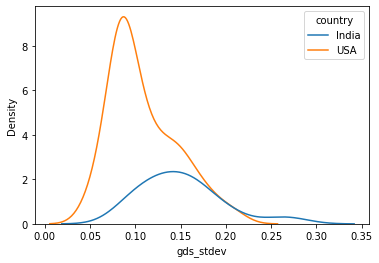

In [ ]:
sns.kdeplot(data = df, x="gds_stdev", hue= "country")

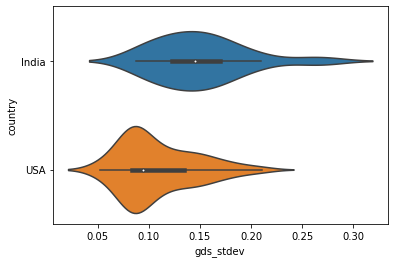

In [ ]:
sns.violinplot(data = df, x = "gds_stdev", y='country')
plt.show()

In [ ]:
df_for_sdev = df[['uni_name', 'pgm_name', 'gds_stdev', 'country']]
df_for_sdev['id'] = df['uni_name'] + " - " + df['pgm_name']

<ipython-input-9-e4a2c653a3bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_sdev['id'] = df['uni_name'] + " - " + df['pgm_name']


In [ ]:
def assign_color(x, word):

    if word in x.lower():
        return 'red'
    return 'blue'

In [ ]:
df_for_sdev['color'] = df_for_sdev.country.apply(lambda x: assign_color(x, 'india'))

<ipython-input-11-147d68ec38d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_sdev['color'] = df_for_sdev.country.apply(lambda x: assign_color(x, 'india'))


In [ ]:
df_for_sdev = df_for_sdev.sort_values(by='gds_stdev', ascending=False)

<BarContainer object of 111 artists>

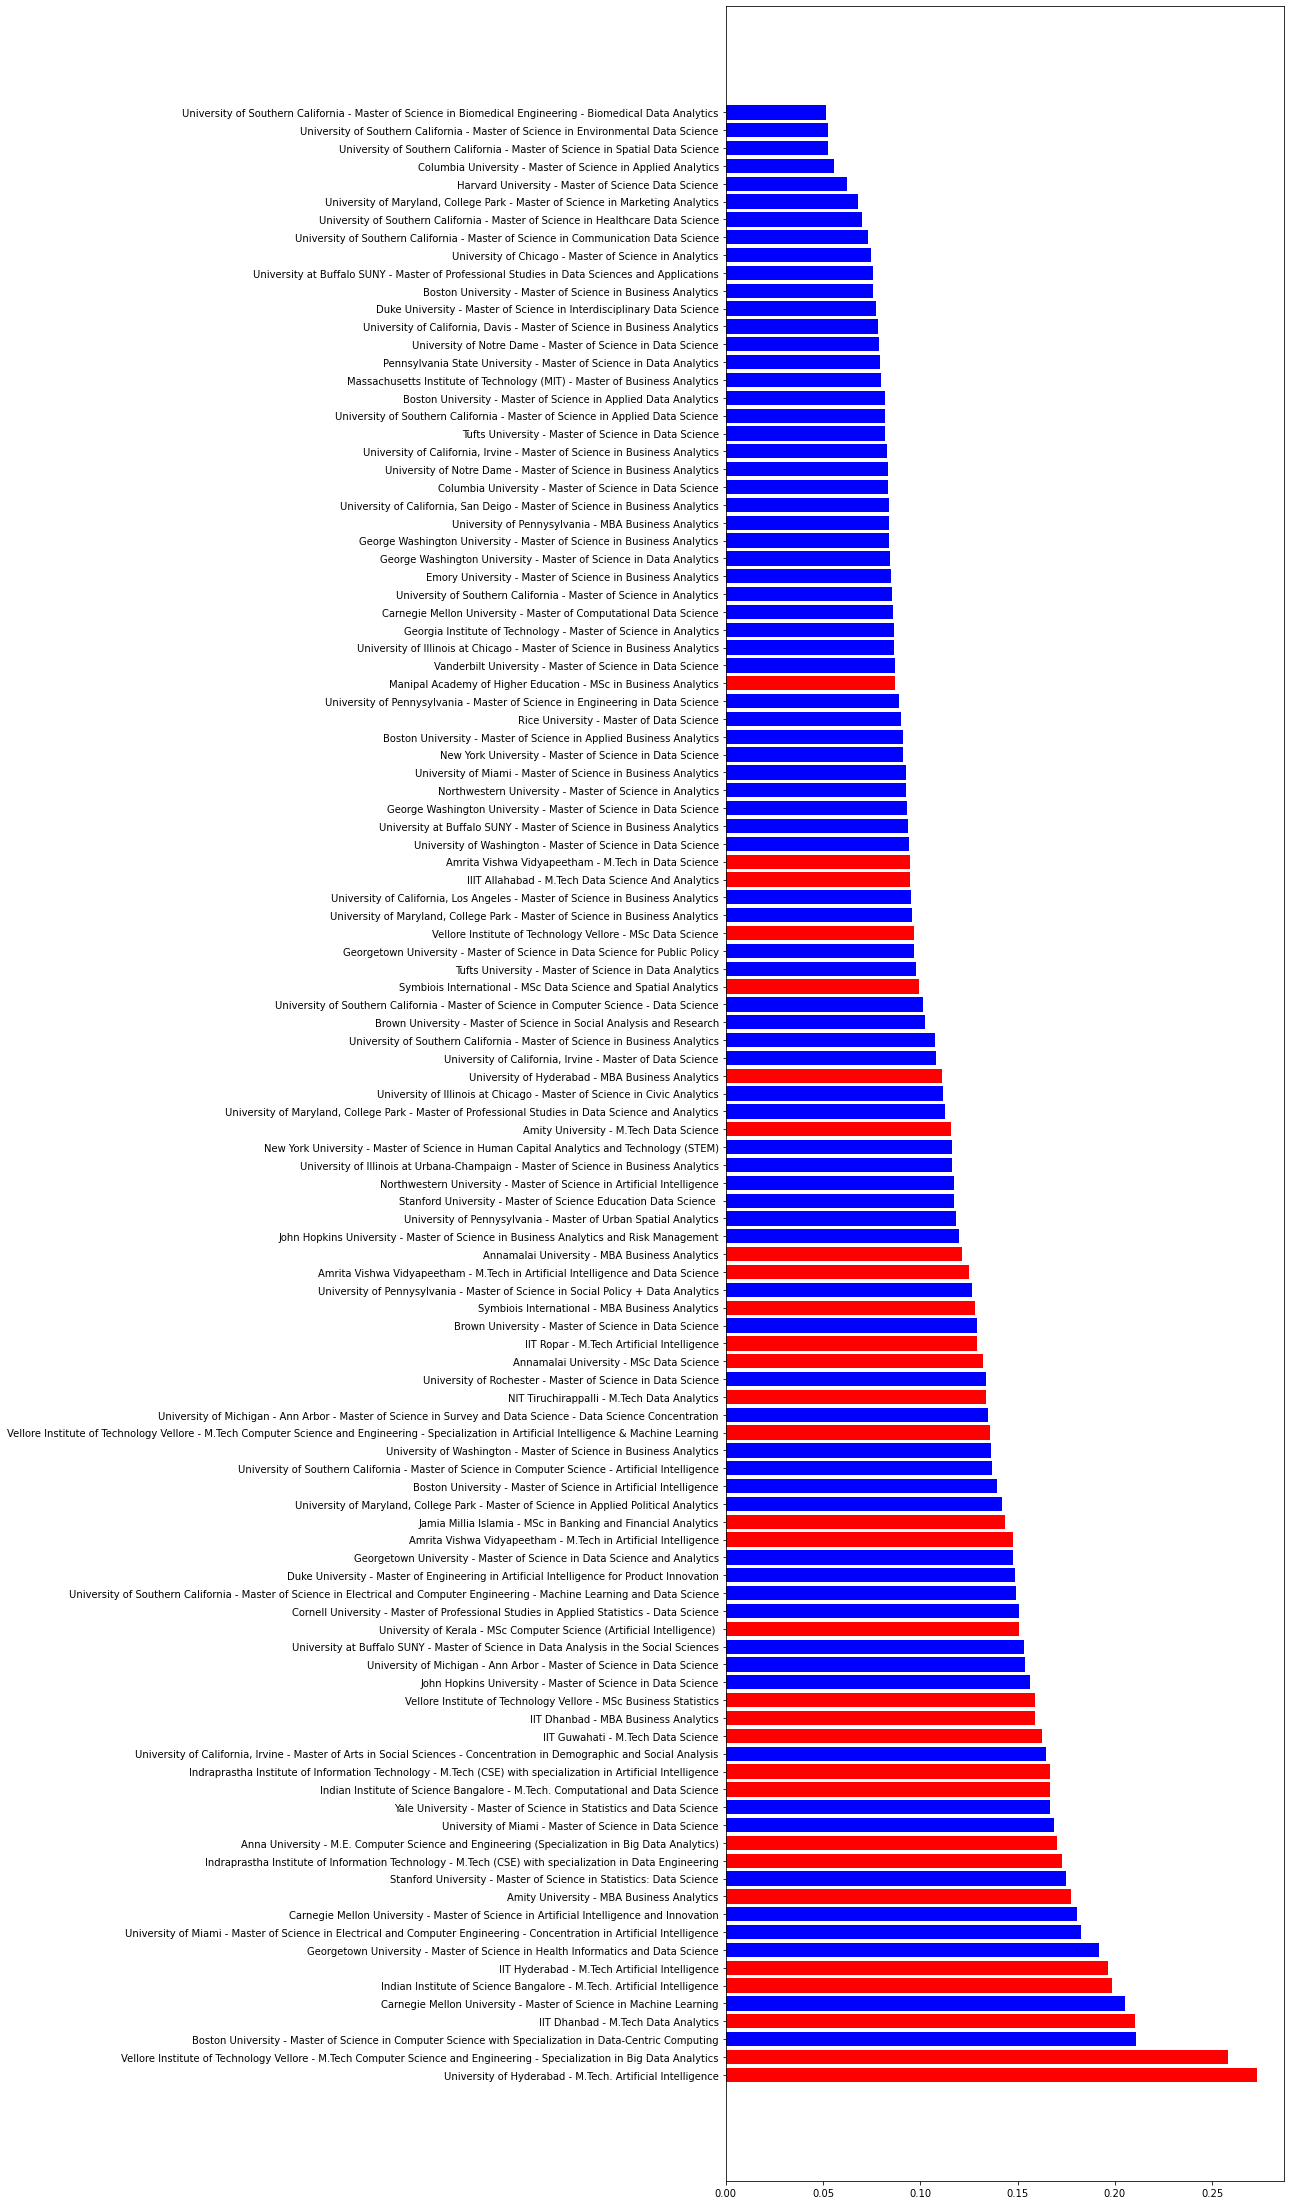

In [ ]:
plt.figure(figsize=(10,40))
plt.barh(y=df_for_sdev['id'], width=df_for_sdev['gds_stdev'], color=df_for_sdev['color'])

<AxesSubplot:xlabel='band', ylabel='count'>

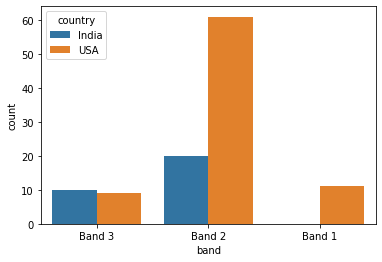

In [ ]:
sns.countplot(data=df, x='band', hue='country')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=596b9f0a-2431-4aa3-878c-95287ebfbe9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>